# Objective
Investigate the multifaceted factors influencing airline passenger satisfaction to develop actionable insights aimed at enhancing customer experience. By identifying and addressing key drivers of satisfaction, this project aims to optimize revenue generation and minimize marketing expenditures for airlines.

# Data Acquisition and Analysis
### 1. Import the Files

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import graphviz
import scipy.stats as stats
import statsmodels.api as sm
import xgboost as xgb
from  matplotlib.ticker import FuncFormatter
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# Importing data
training_data = pd.read_csv('../input/airline-passenger-satisfaction/train.csv')
testing_data = pd.read_csv('../input/airline-passenger-satisfaction/test.csv')

### 2. Know the Data metadata

In [3]:
# Get number of records and columns in both training and testing dataset
training_data.shape, testing_data.shape

((103904, 25), (25976, 25))

In [4]:
# Display first 10 records of training data set
training_data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [5]:
# Display training data set metadata
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
# Display testing data set metadata
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

**Satisfaction Data Analysis**

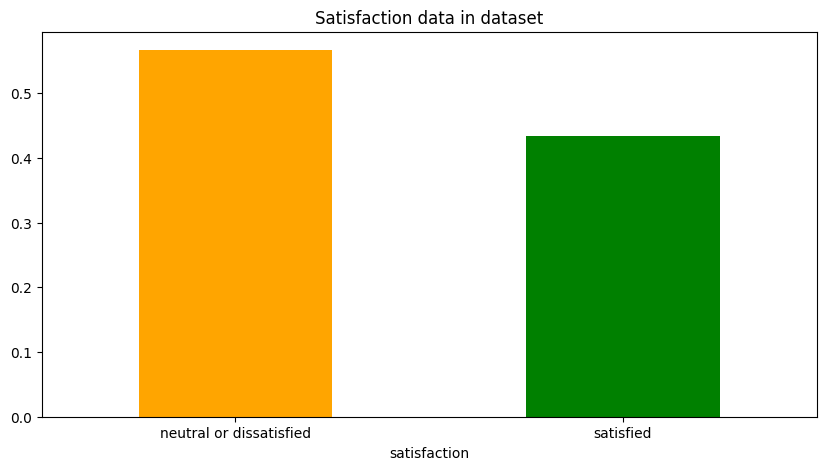

In [7]:
fig = plt.figure(figsize=(10,5))
training_data.satisfaction.value_counts(normalize = True).plot(kind = 'bar', color = ['orange','green'], alpha = 1, rot = 0)
plt.title("Satisfaction data in dataset")
plt.show()

# Data Preprocessing
 
**1. Remove unwanted columns**

There are 2 unwanted columns Unnamed and id in both training and testing set which are undesired and should be removed before proceeding further

In [8]:
training_data = training_data.drop("Unnamed: 0", axis =1)
training_data = training_data.drop("id", axis =1)
testing_data = testing_data.drop("Unnamed: 0", axis =1)
testing_data = testing_data.drop("id", axis =1)

**2. Column names normalization**

In [9]:
# Remove spaces from column names for ease of access
training_data.columns = [c.replace(' ', '_') for c in training_data.columns]
testing_data.columns = [c.replace(' ', '_') for c in testing_data.columns]

**3. Fill Missing Values**

In [10]:
#Identify and fill null values in both training and test dataset
total_null_values = training_data.isnull().sum().sort_values(ascending=False)
total_null_values.head(10)

Arrival_Delay_in_Minutes      310
Gender                          0
Seat_comfort                    0
Departure_Delay_in_Minutes      0
Cleanliness                     0
Inflight_service                0
Checkin_service                 0
Baggage_handling                0
Leg_room_service                0
On-board_service                0
dtype: int64

In [11]:
# Lets fill the null values in Arrival_Delay_in_Minutes column with mean value of respective column
training_data['Arrival_Delay_in_Minutes'] = training_data['Arrival_Delay_in_Minutes'].fillna(training_data['Arrival_Delay_in_Minutes'].mean())
testing_data['Arrival_Delay_in_Minutes'] = testing_data['Arrival_Delay_in_Minutes'].fillna(testing_data['Arrival_Delay_in_Minutes'].mean())

In [12]:
training_data['Gender'] = training_data['Gender'].fillna(training_data['Gender'].mode()[0])
training_data['Customer_Type'] = training_data['Customer_Type'].fillna(training_data['Customer_Type'].mode()[0])
testing_data['Type_of_Travel'] = testing_data['Type_of_Travel'].fillna(testing_data['Type_of_Travel'].mode()[0])
testing_data['Class'] = testing_data['Class'].fillna(testing_data['Class'].mode()[0])

**4. Categorical Data Conversion**

In [13]:
encoder = OneHotEncoder(sparse_output=False)

# Identify Categorical columns
categorical_columns = ['Class']

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(training_data[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
training_data_encoded = pd.concat([training_data, one_hot_df], axis=1)

# Drop the original categorical columns
training_data_encoded = training_data_encoded.drop(categorical_columns, axis=1)

training_data_encoded.head()

len_coders = {}
for col in training_data_encoded.select_dtypes(include=['object']).columns:
    len_coders[col] = LabelEncoder()
    training_data_encoded[col] = len_coders[col].fit_transform(training_data_encoded[col])

In [14]:
# Identify Categorical columns
categorical_test_columns =  ['Class']

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(testing_data[categorical_test_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_test_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
testing_data_encoded = pd.concat([testing_data, one_hot_df], axis=1)

# Drop the original categorical columns
testing_data_encoded = testing_data_encoded.drop(categorical_test_columns, axis=1)

testing_data_encoded.head()
len_coders = {}
for col in testing_data_encoded.select_dtypes(include=['object']).columns:
    len_coders[col] = LabelEncoder()
    testing_data_encoded[col] = len_coders[col].fit_transform(testing_data_encoded[col])

In [15]:
training_data_encoded.columns = [c.replace(' ', '_') for c in training_data_encoded.columns]
testing_data_encoded.columns = [c.replace(' ', '_') for c in testing_data_encoded.columns]

# Data Visualization


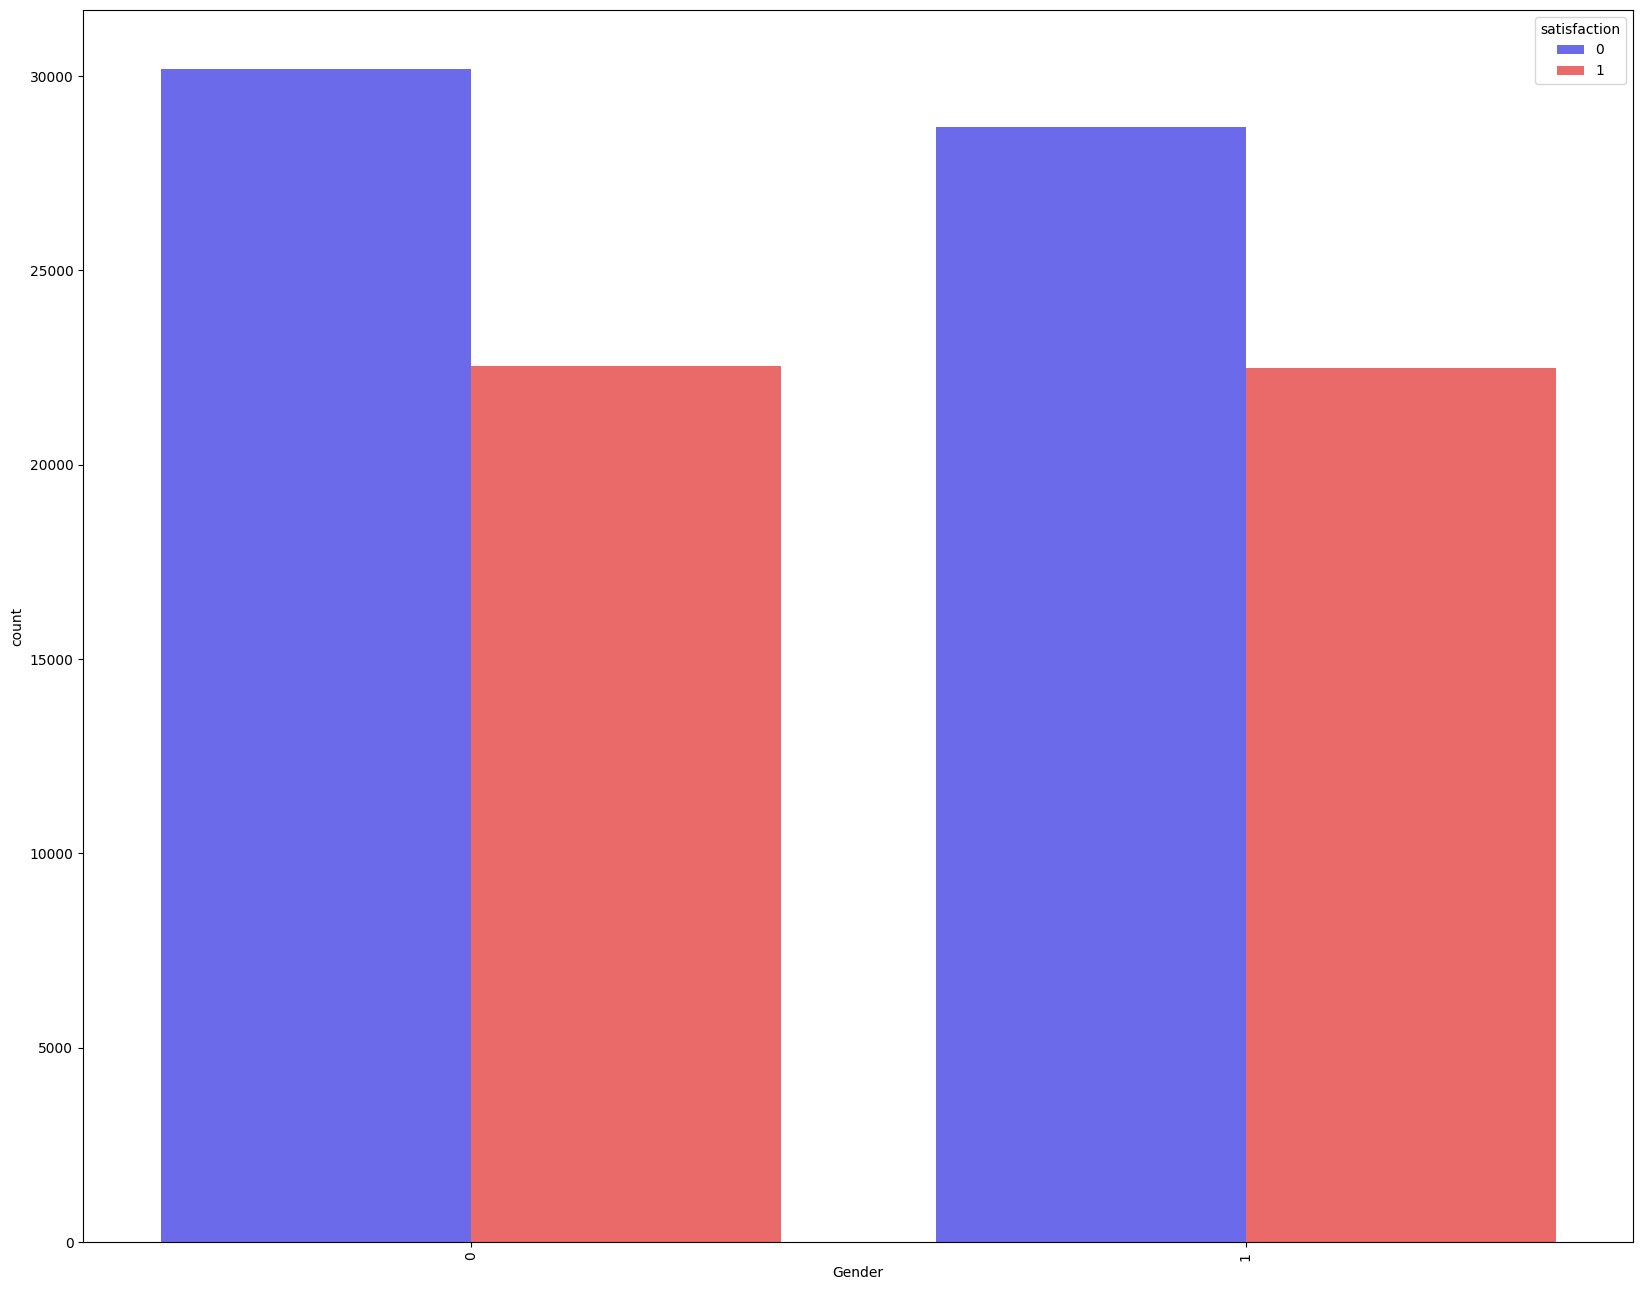

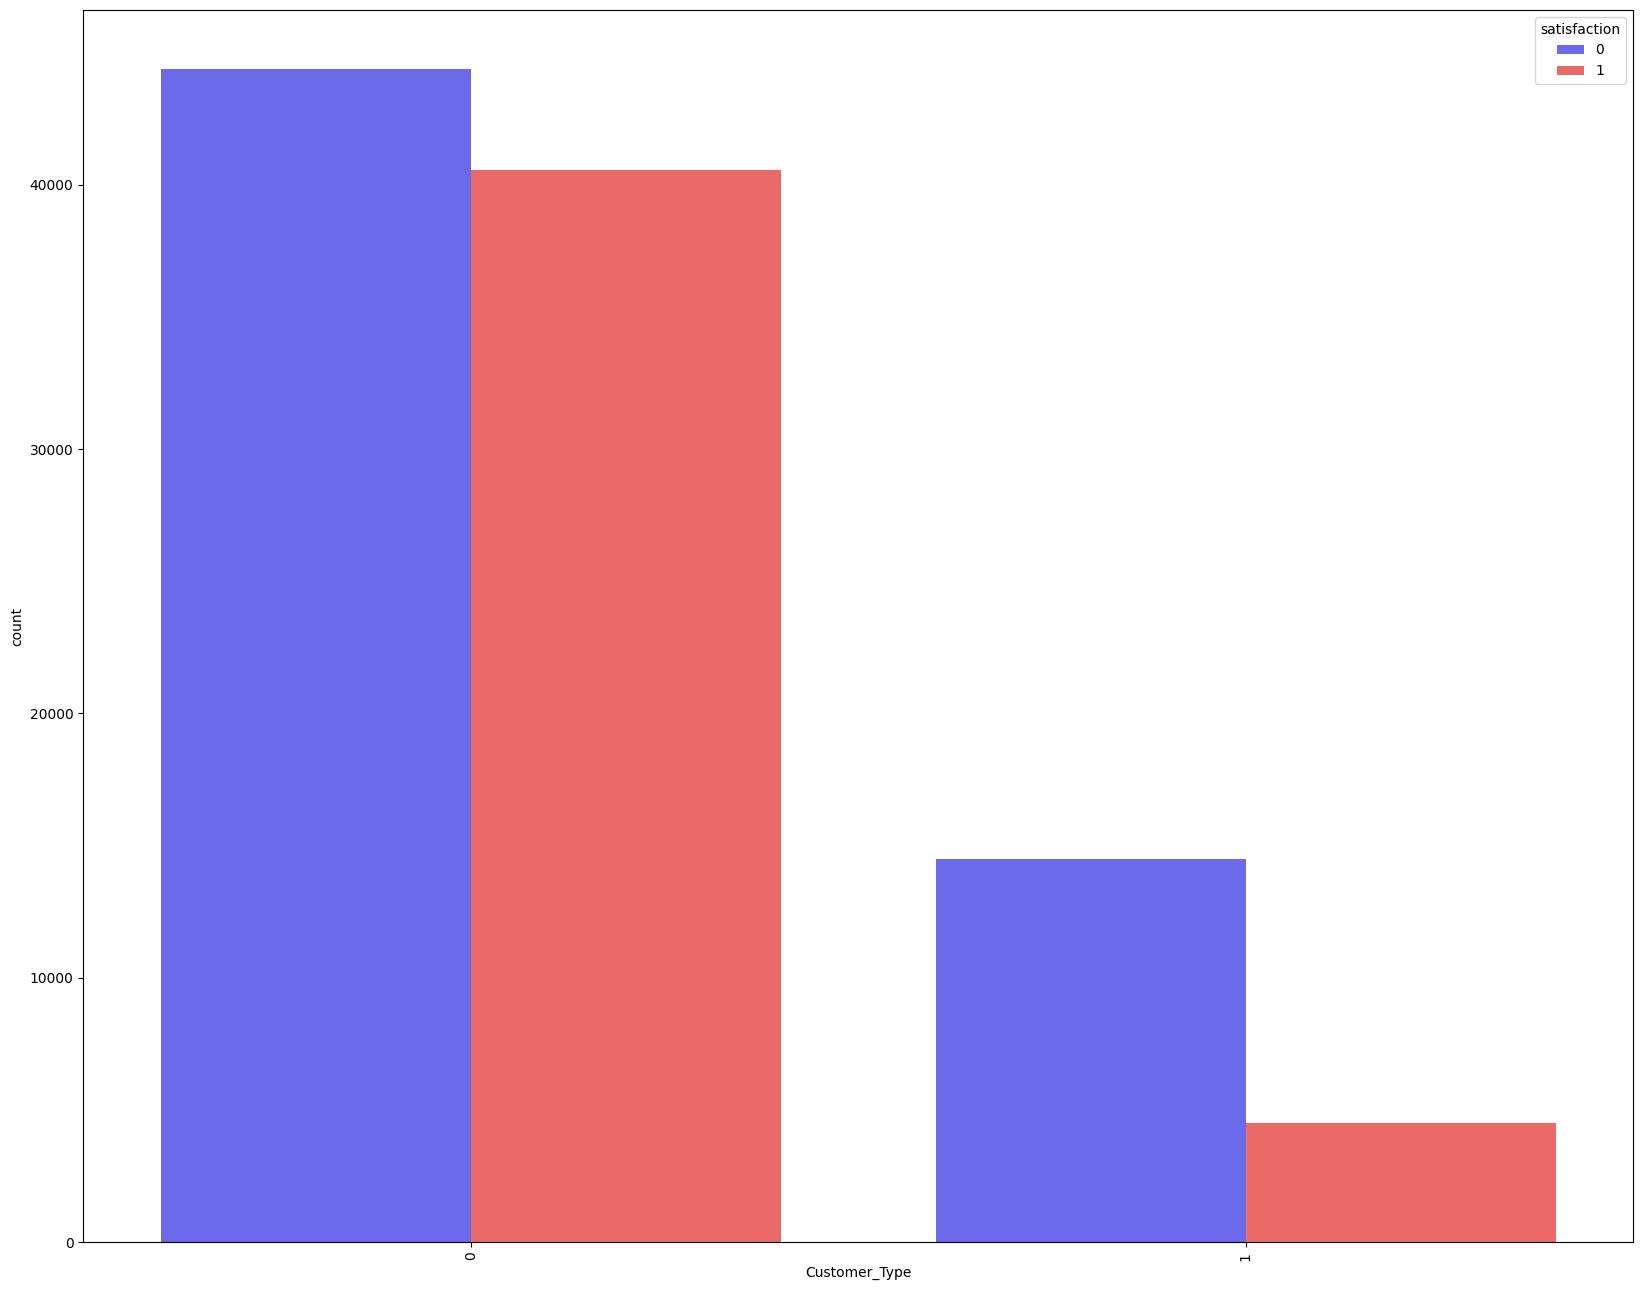

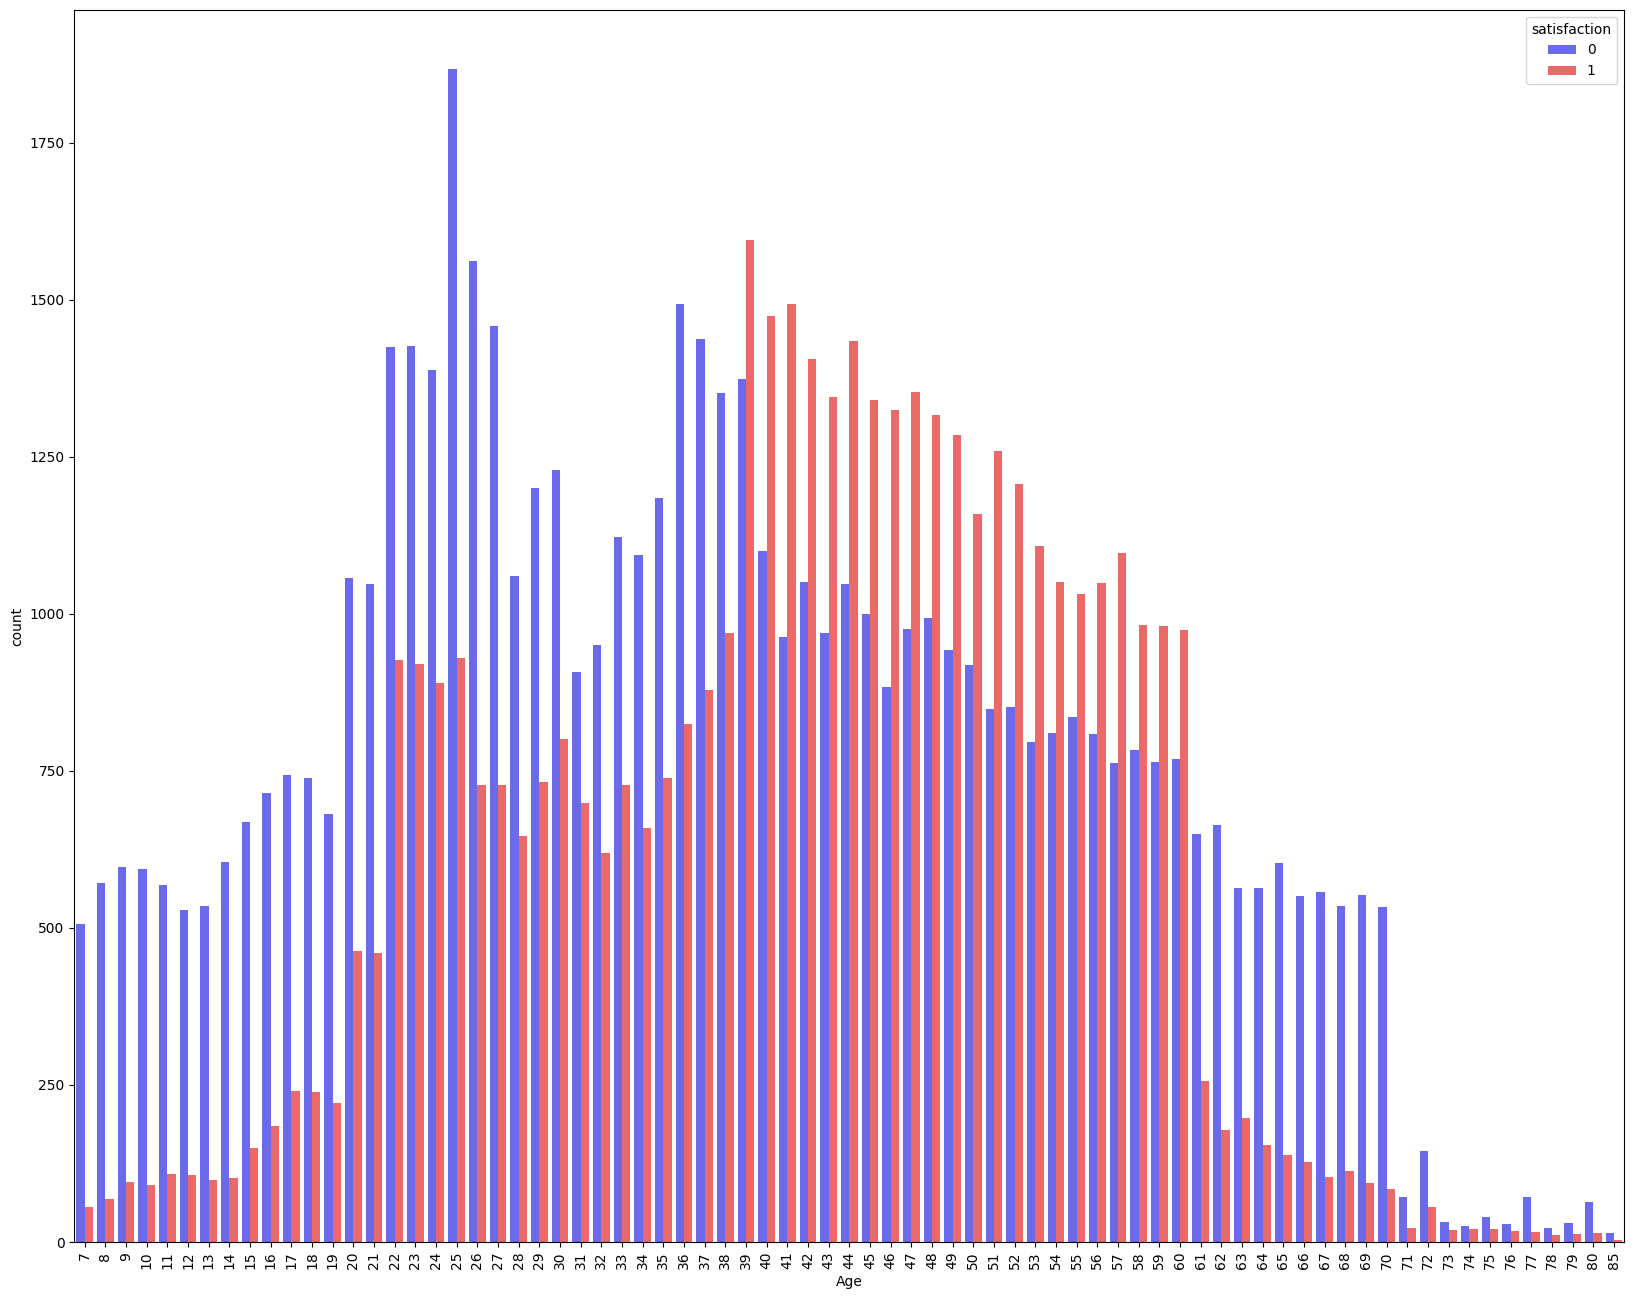

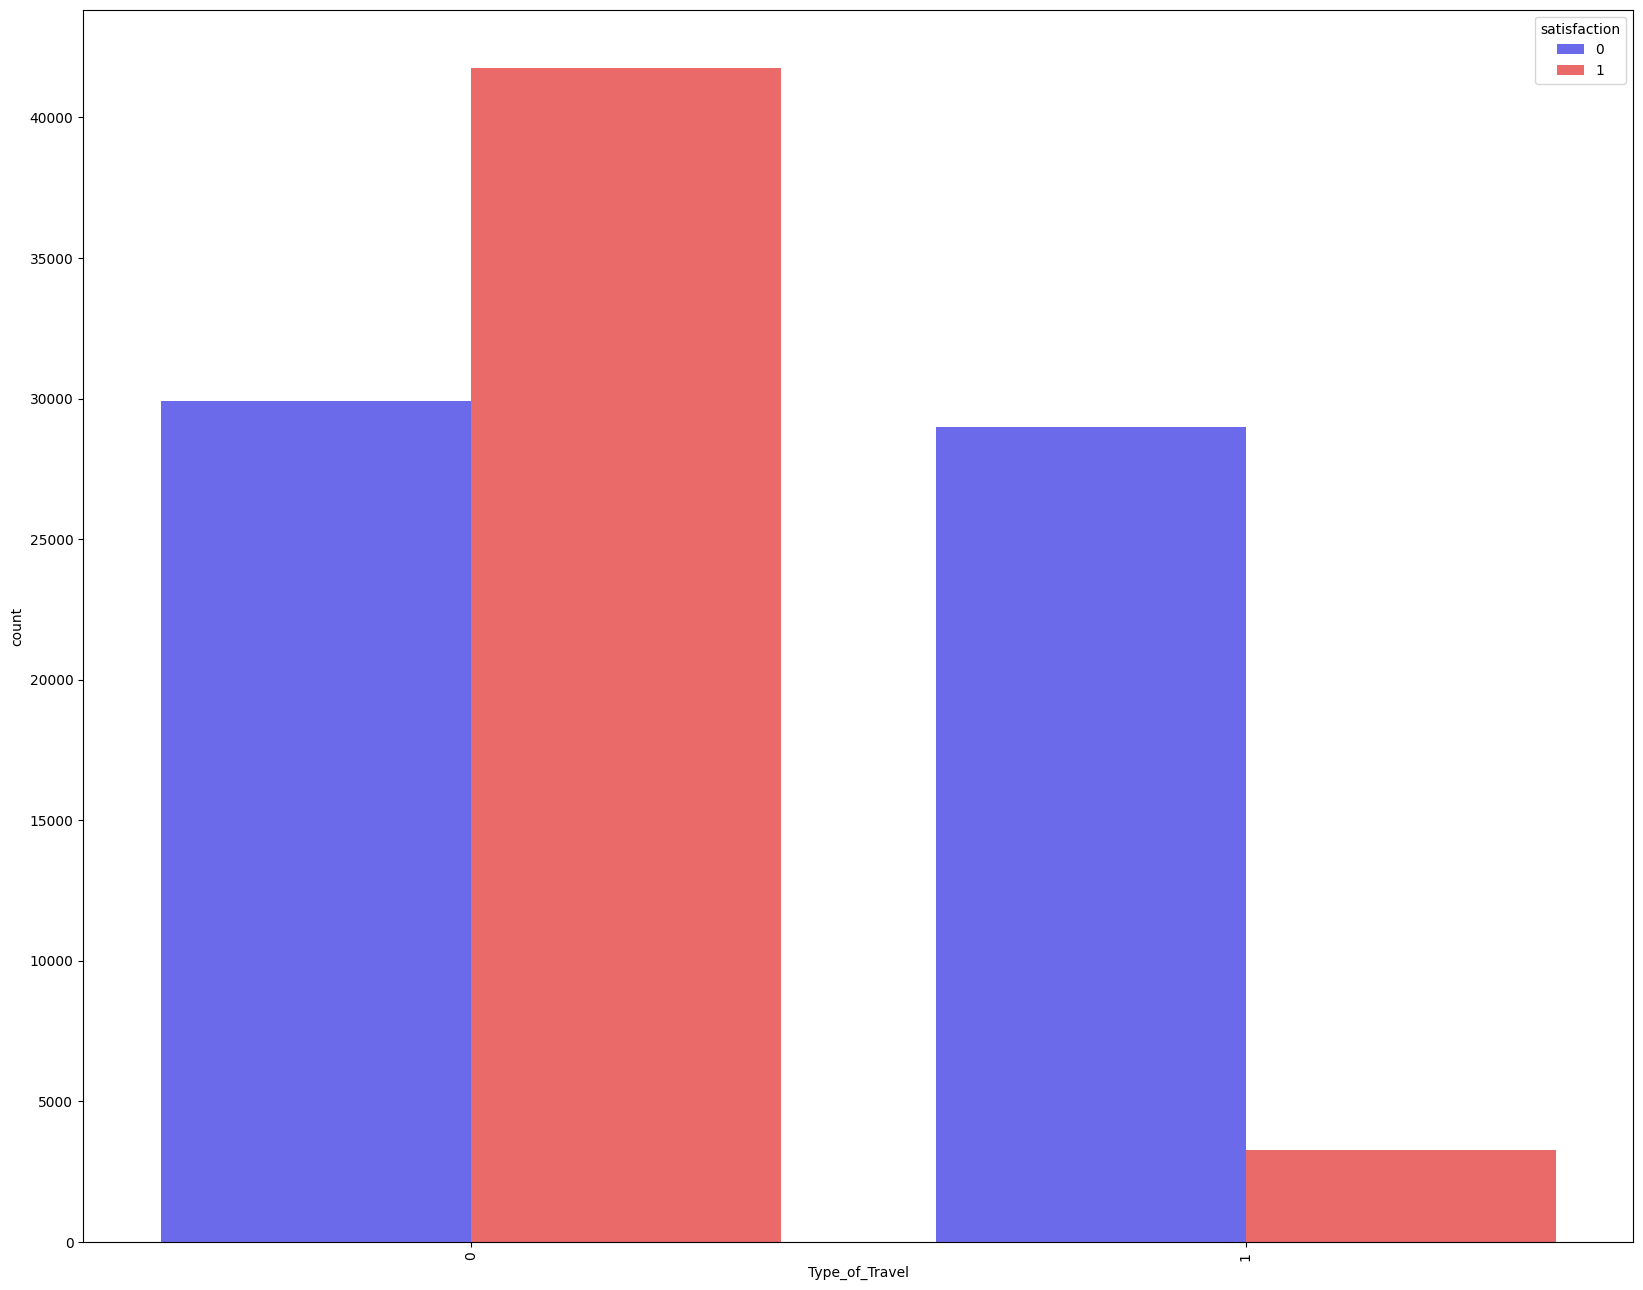

<Figure size 2000x1600 with 0 Axes>

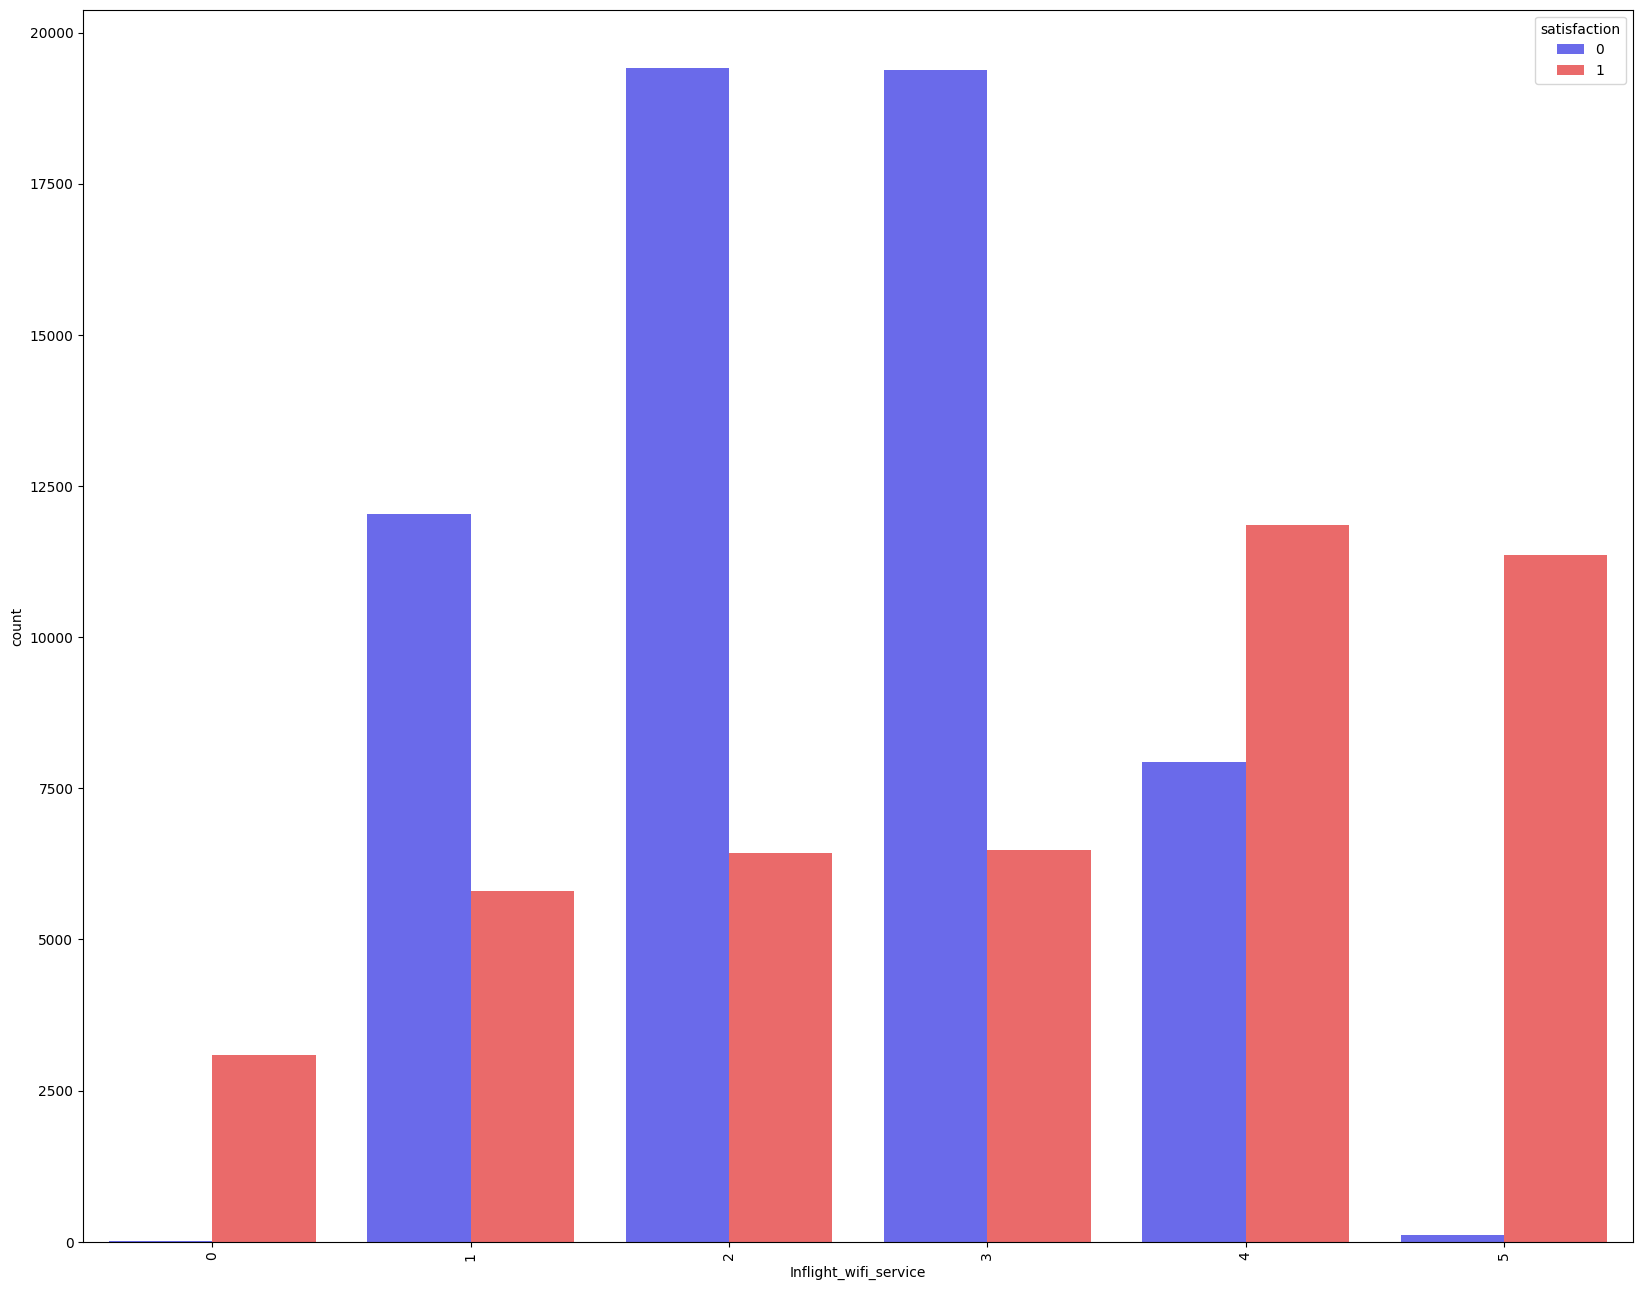

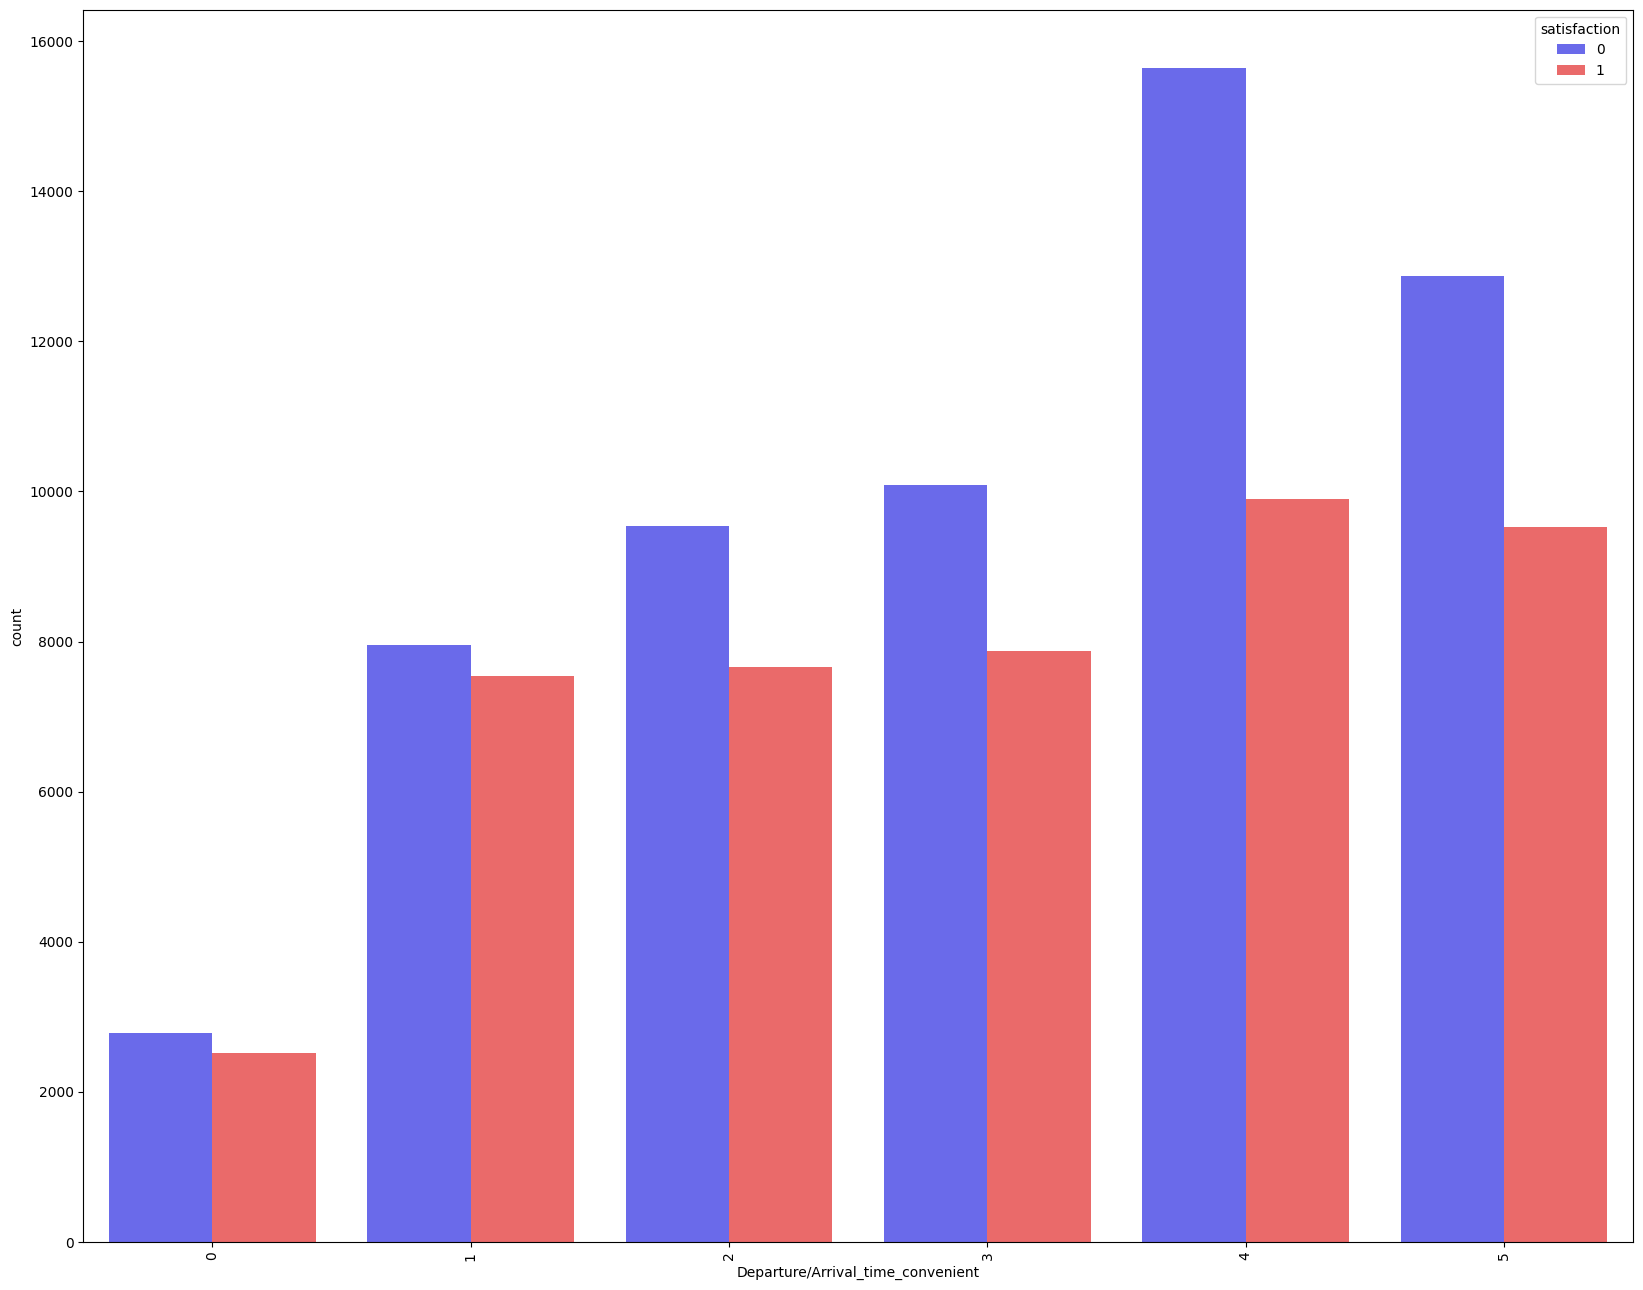

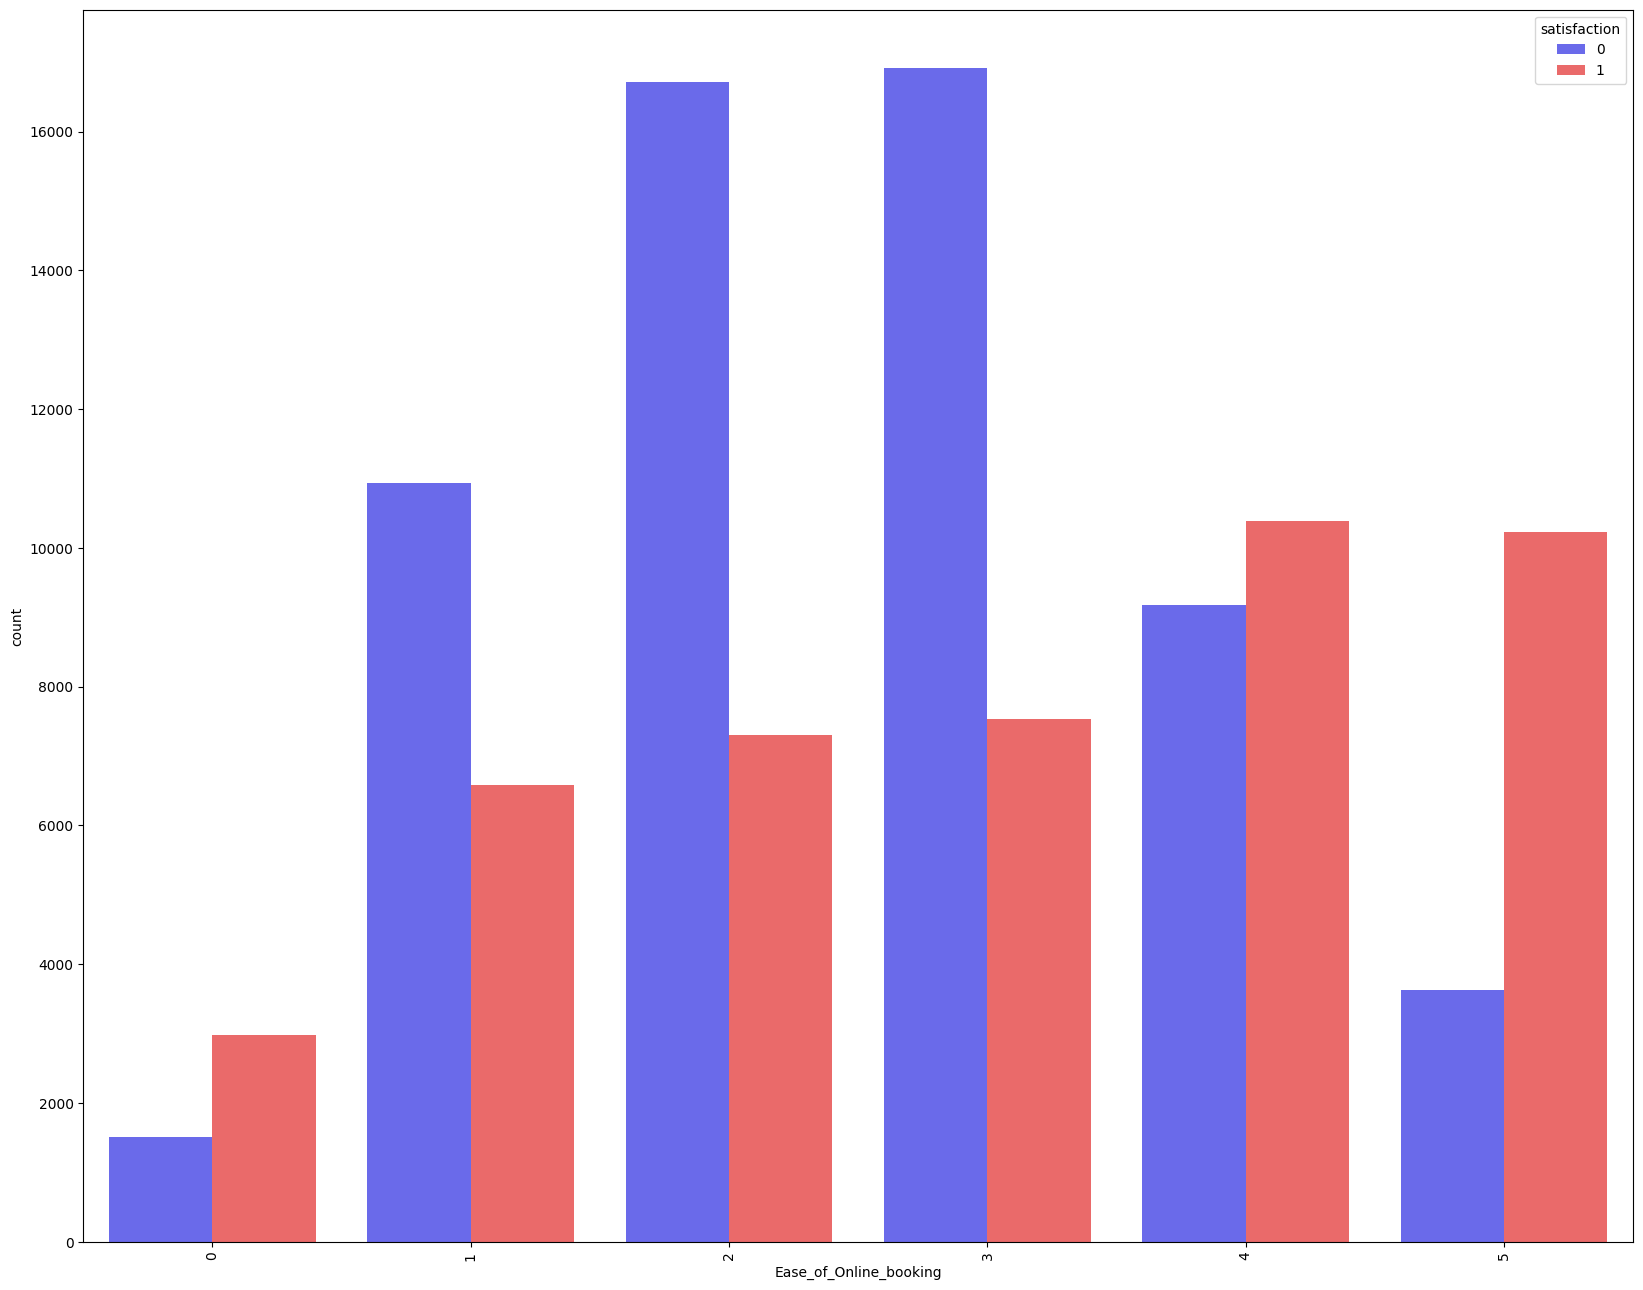

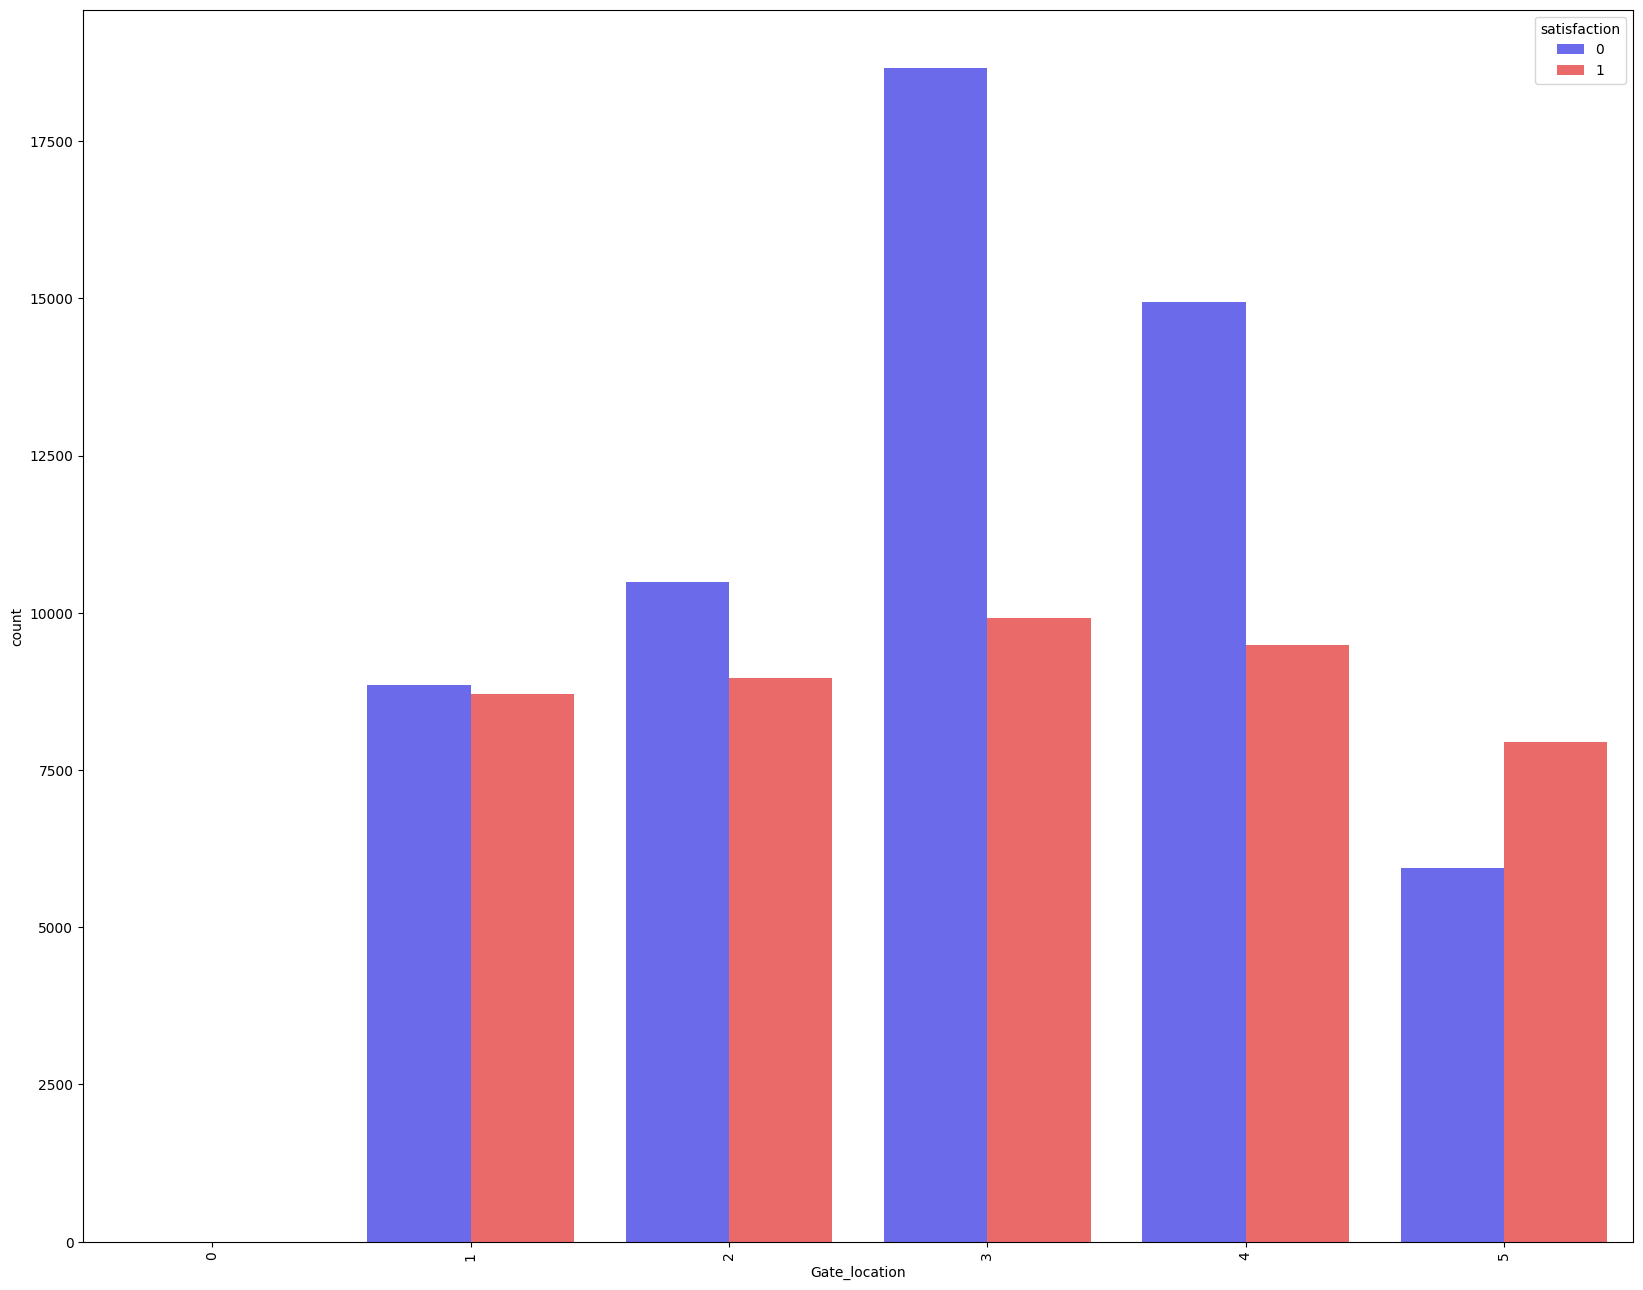

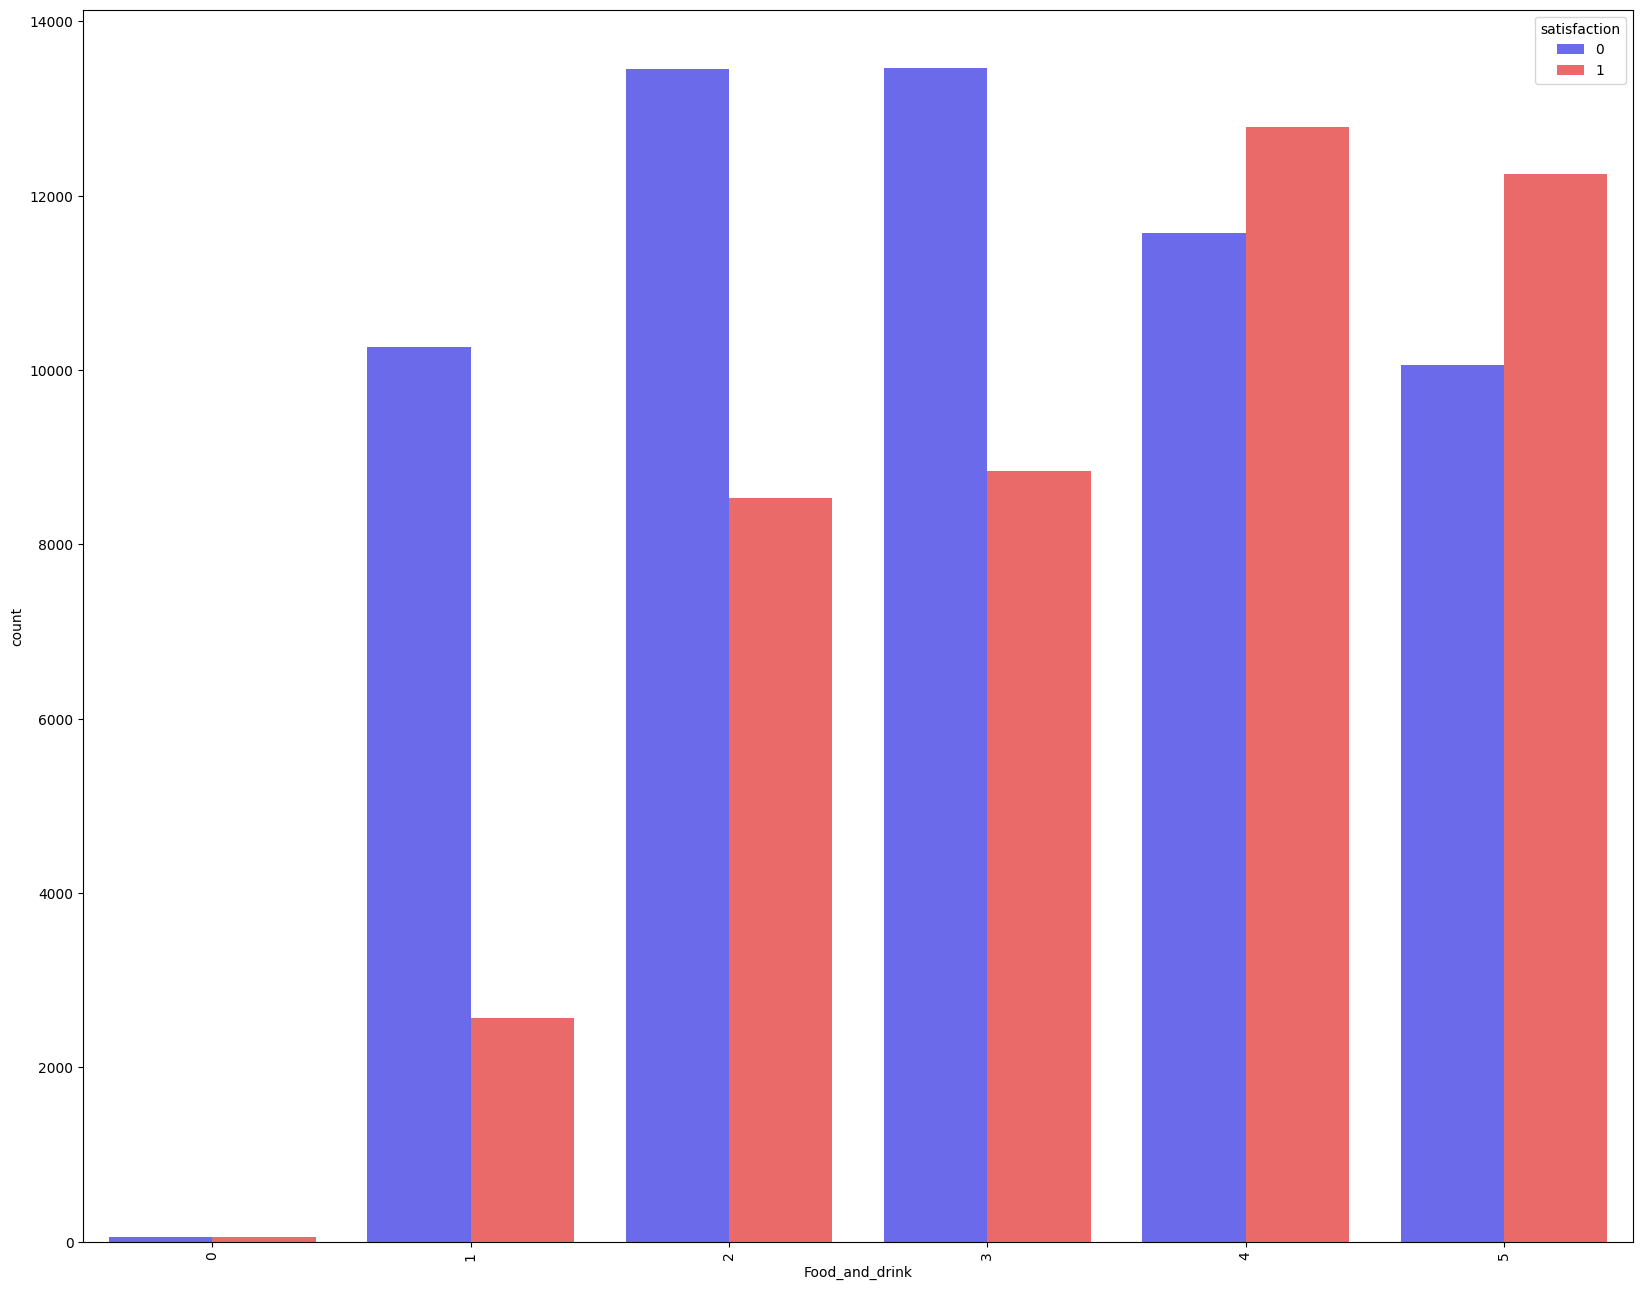

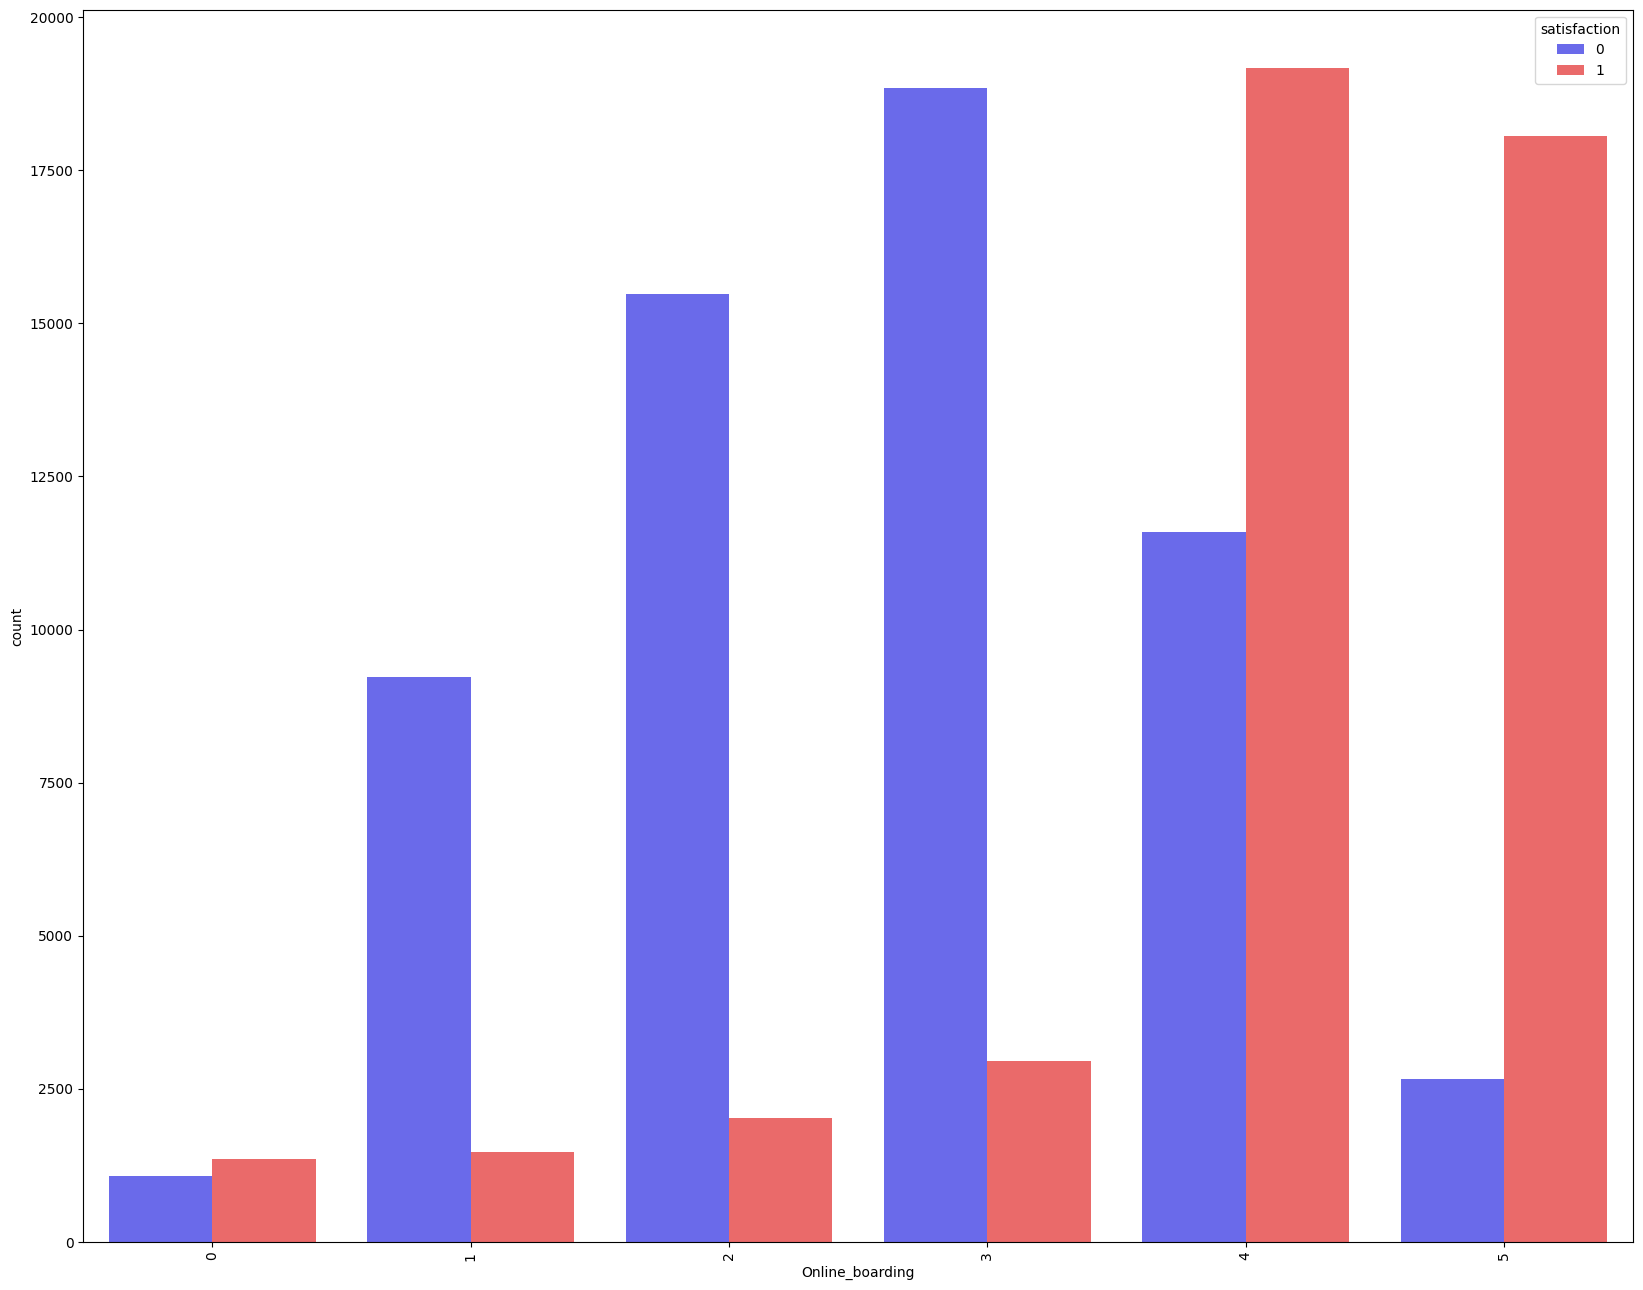

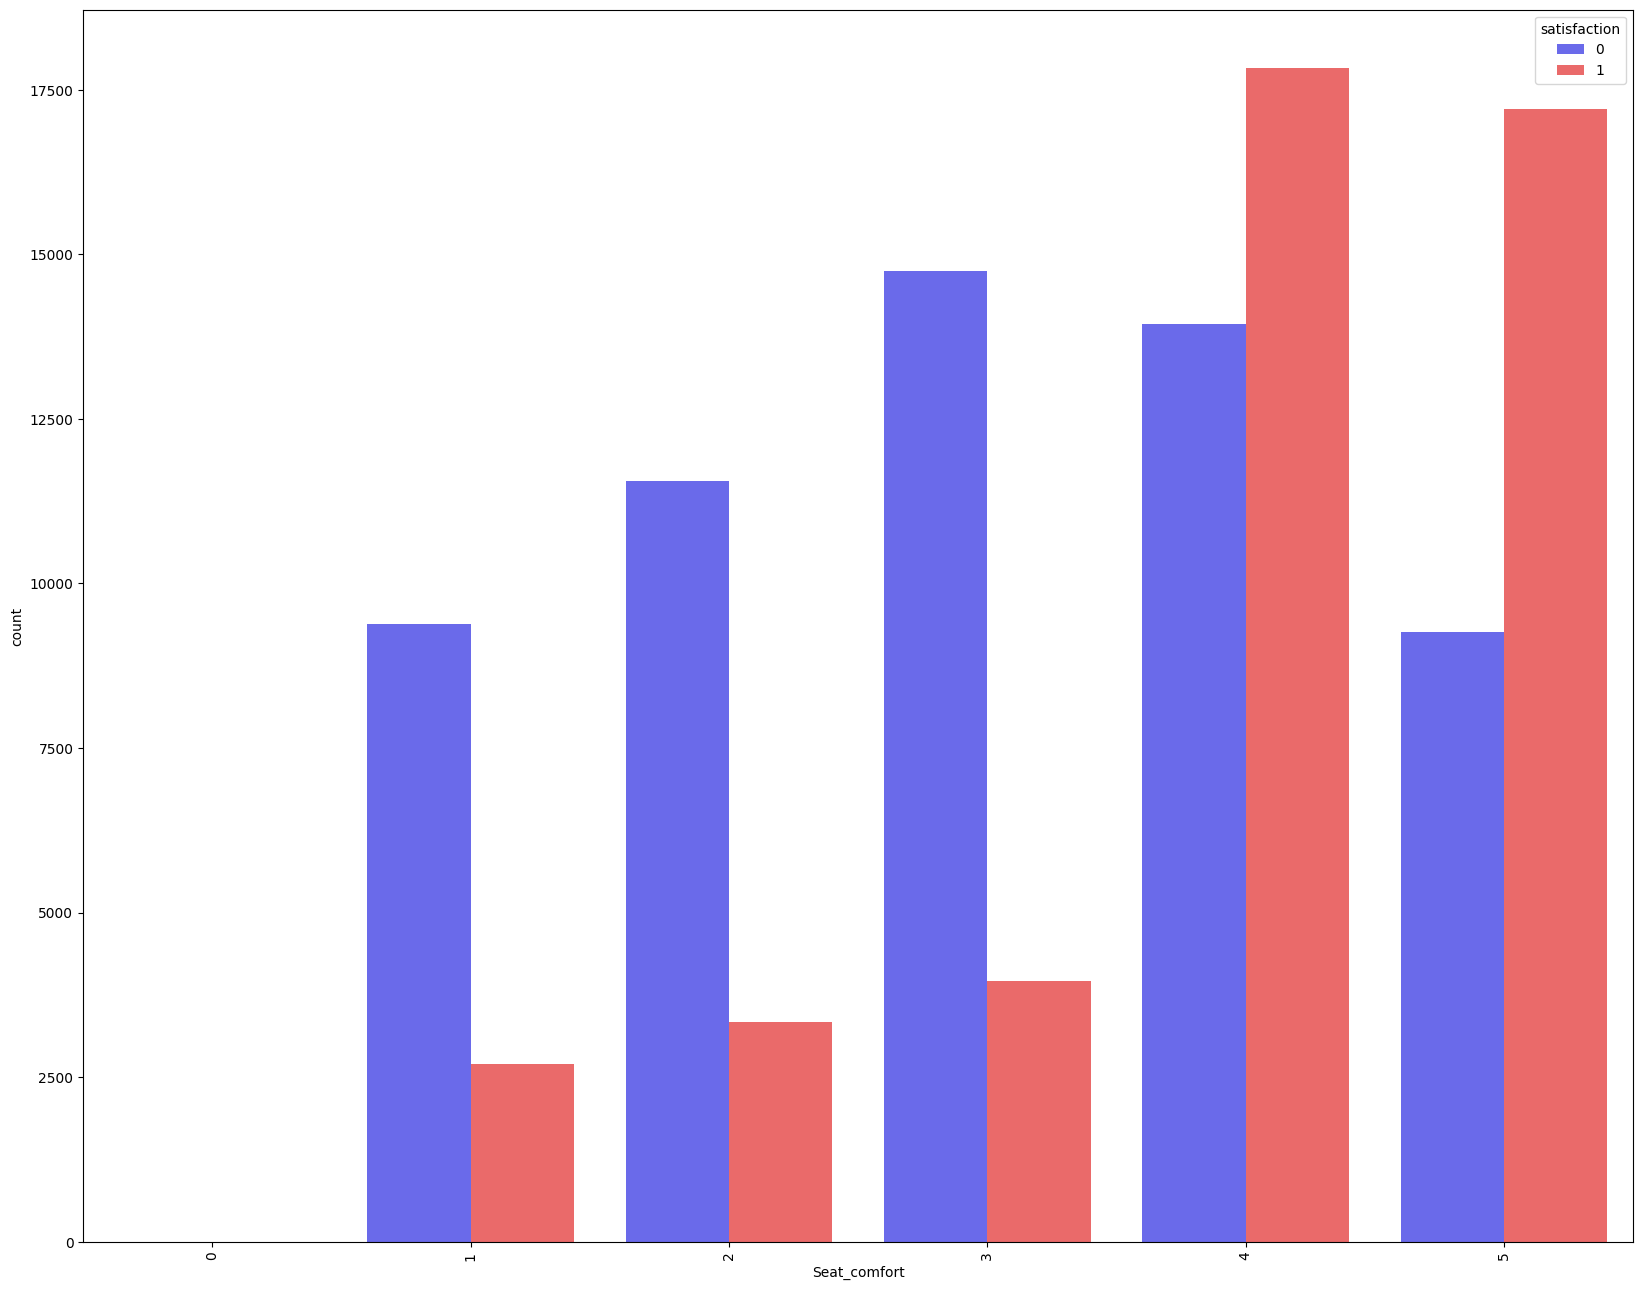

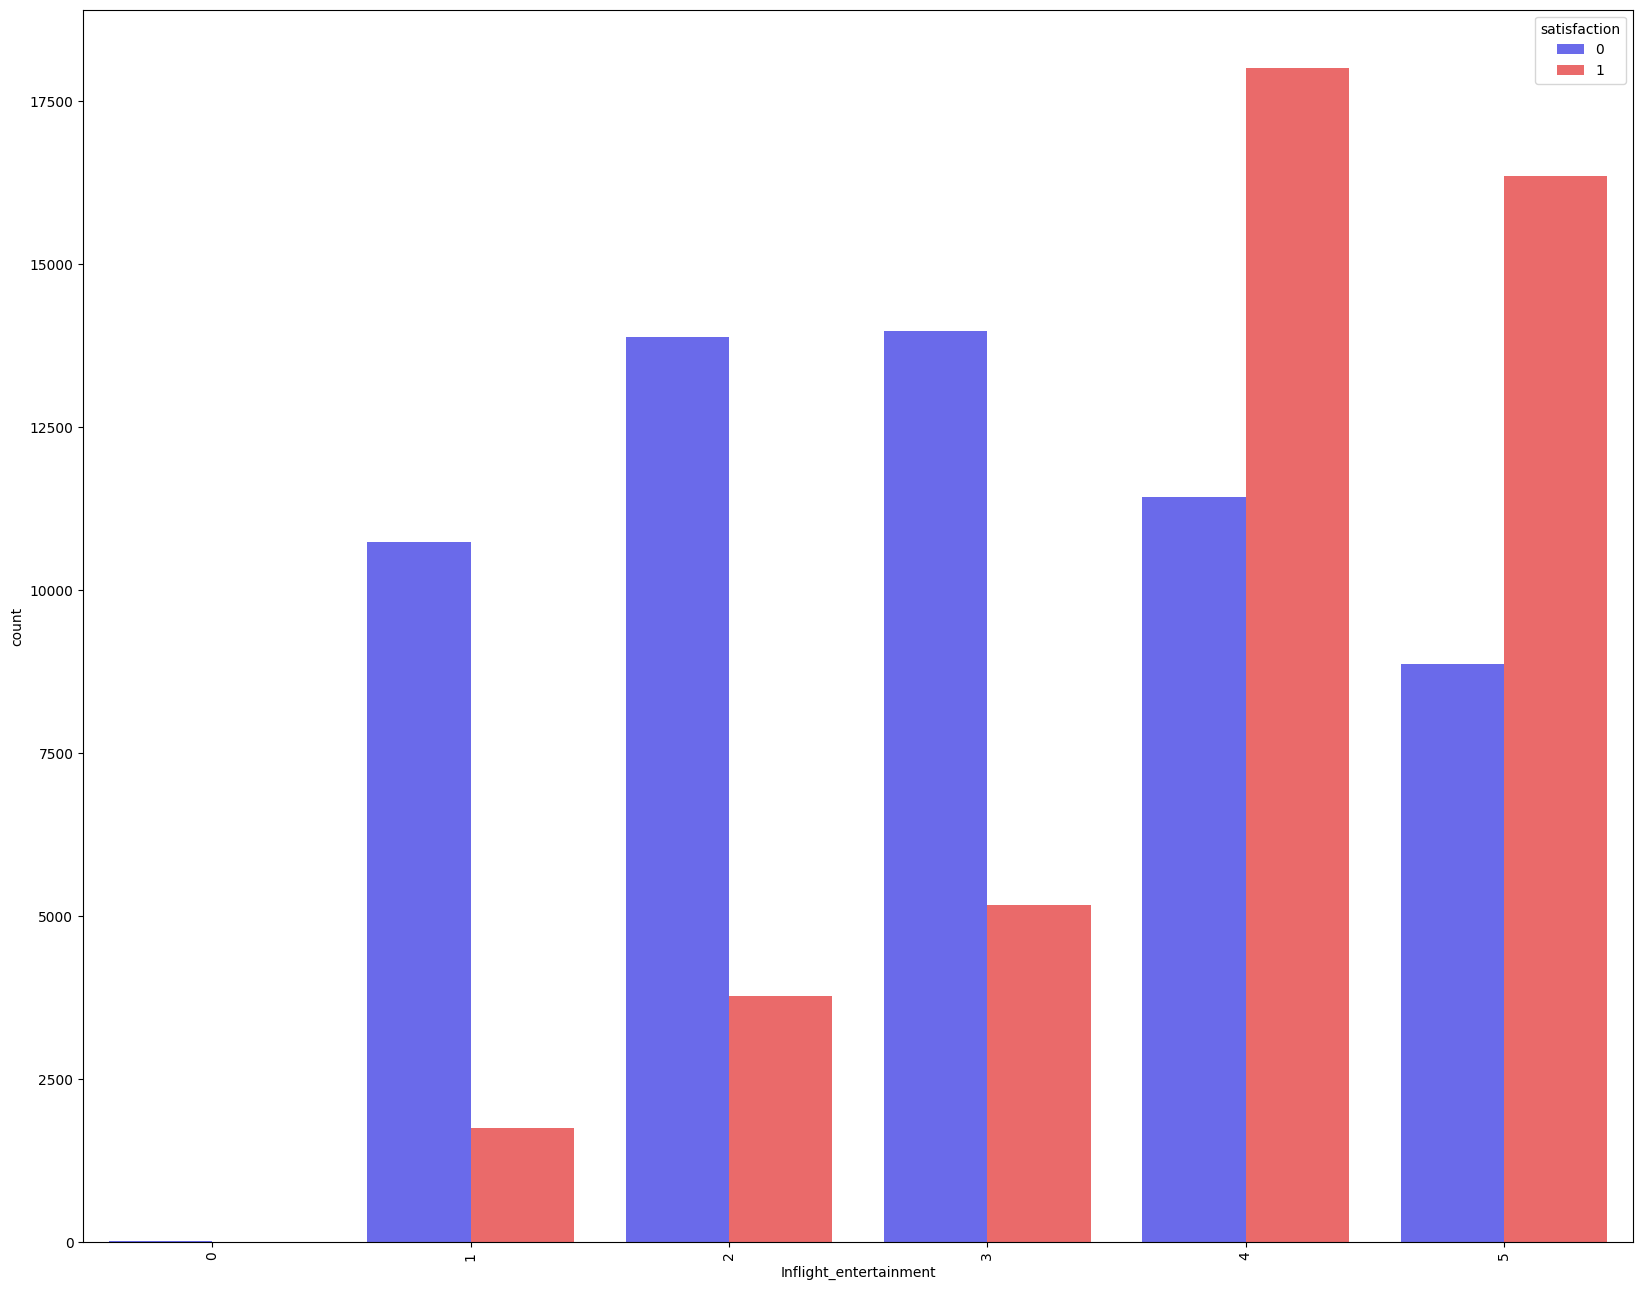

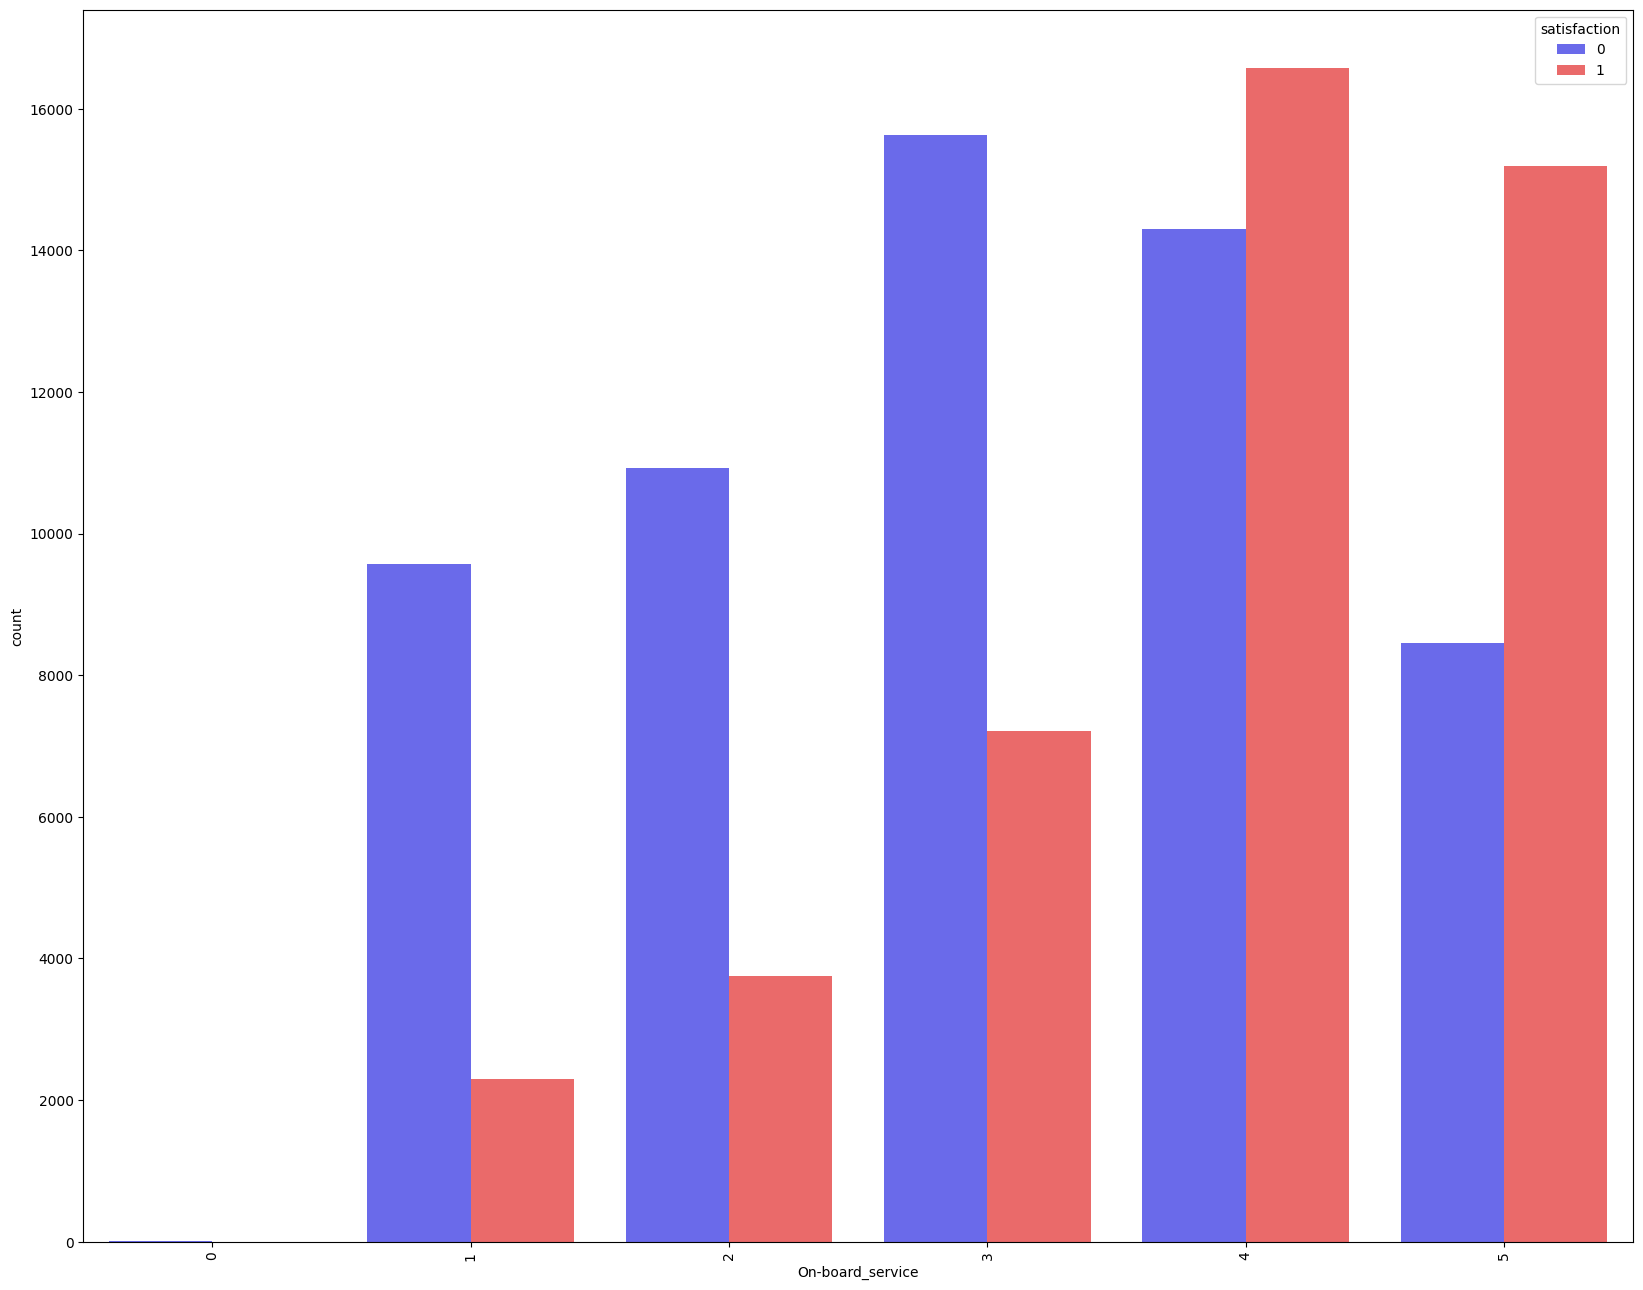

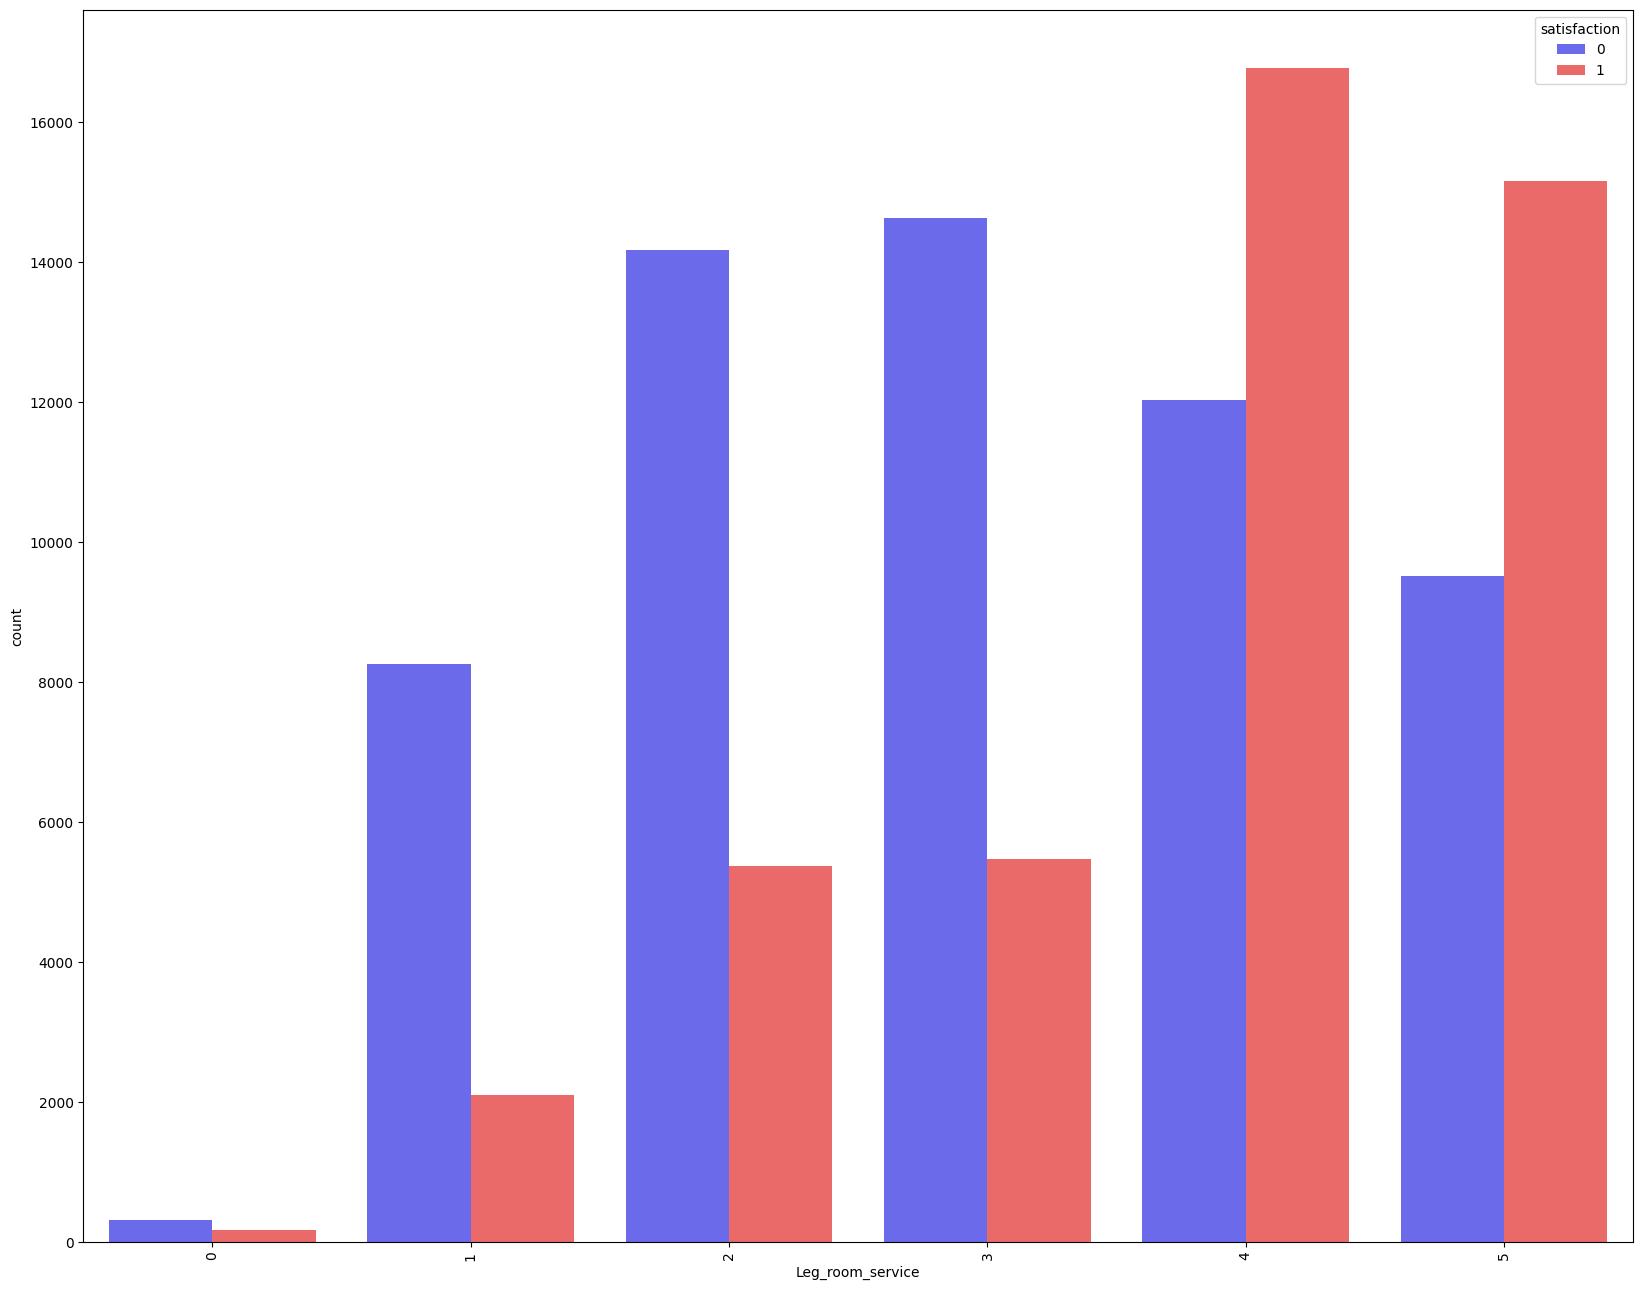

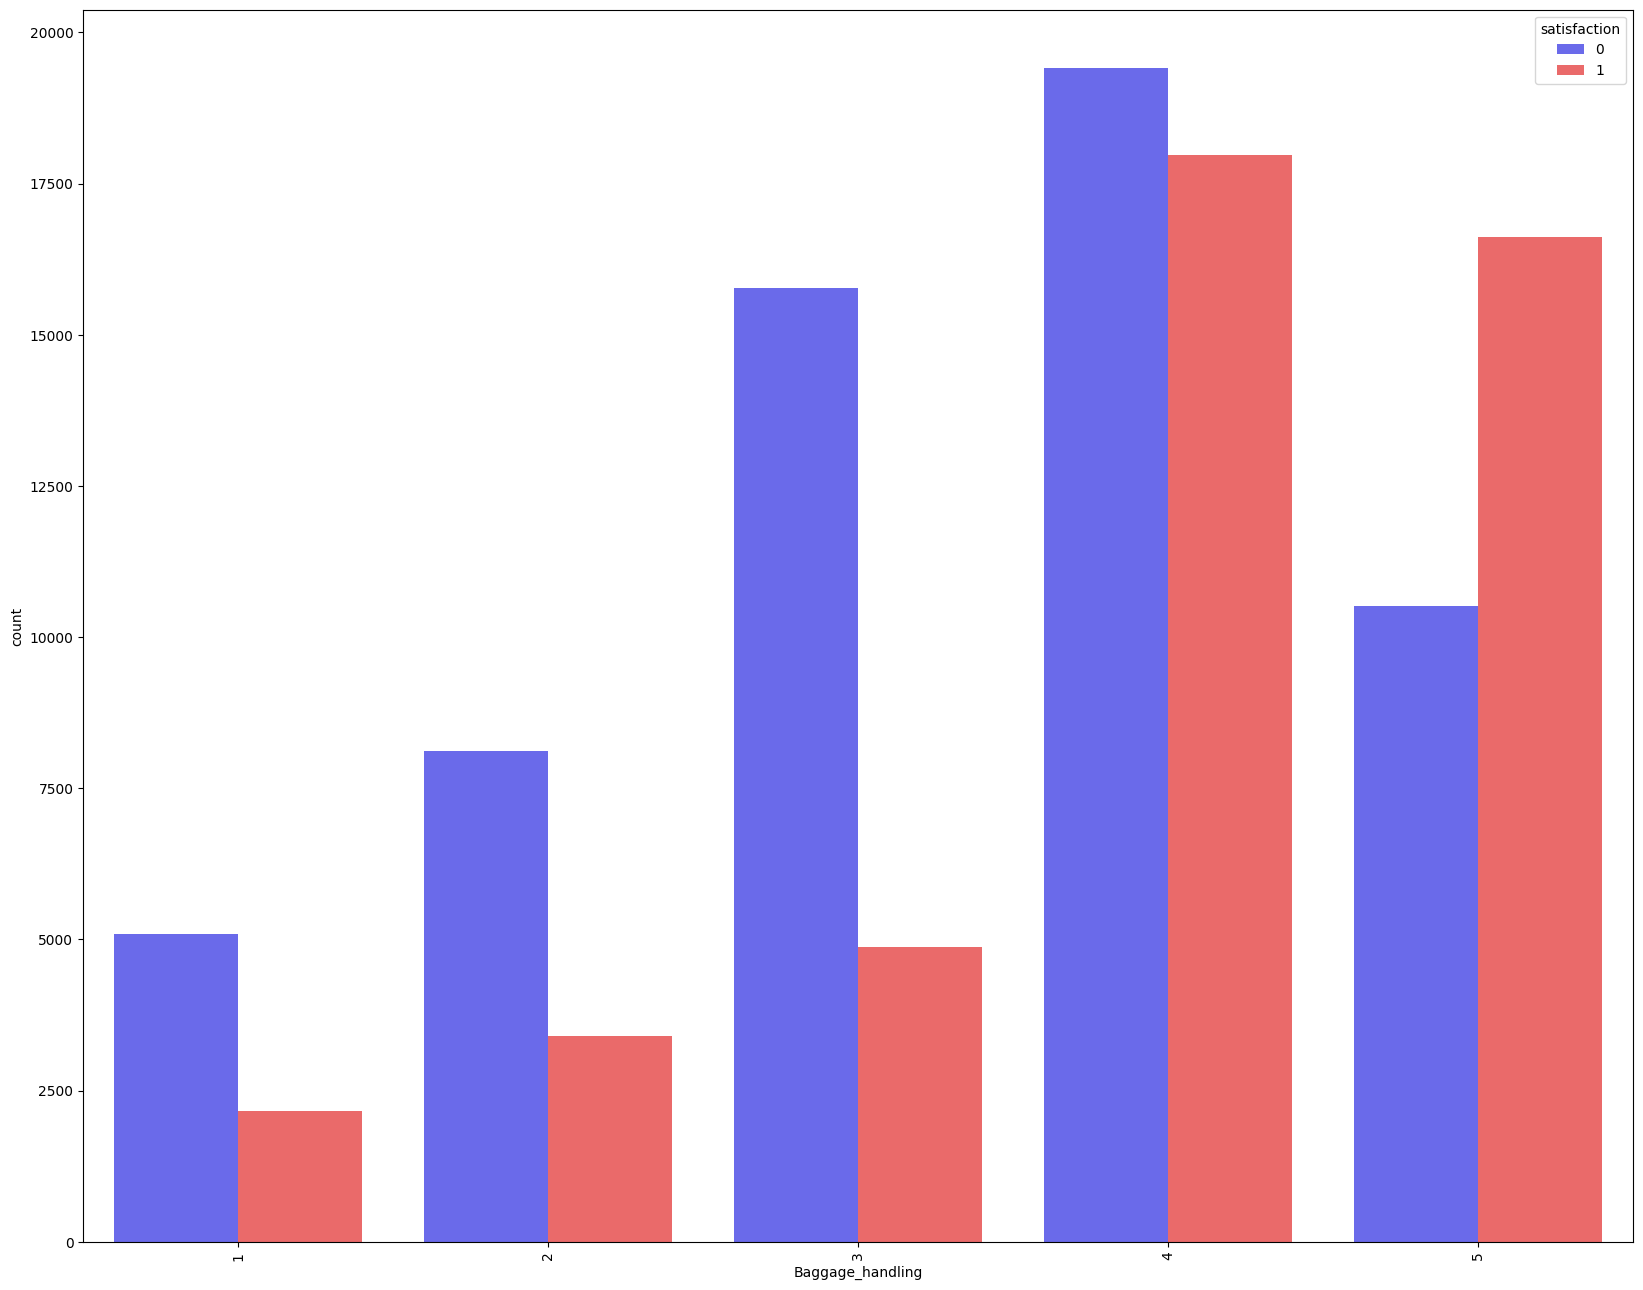

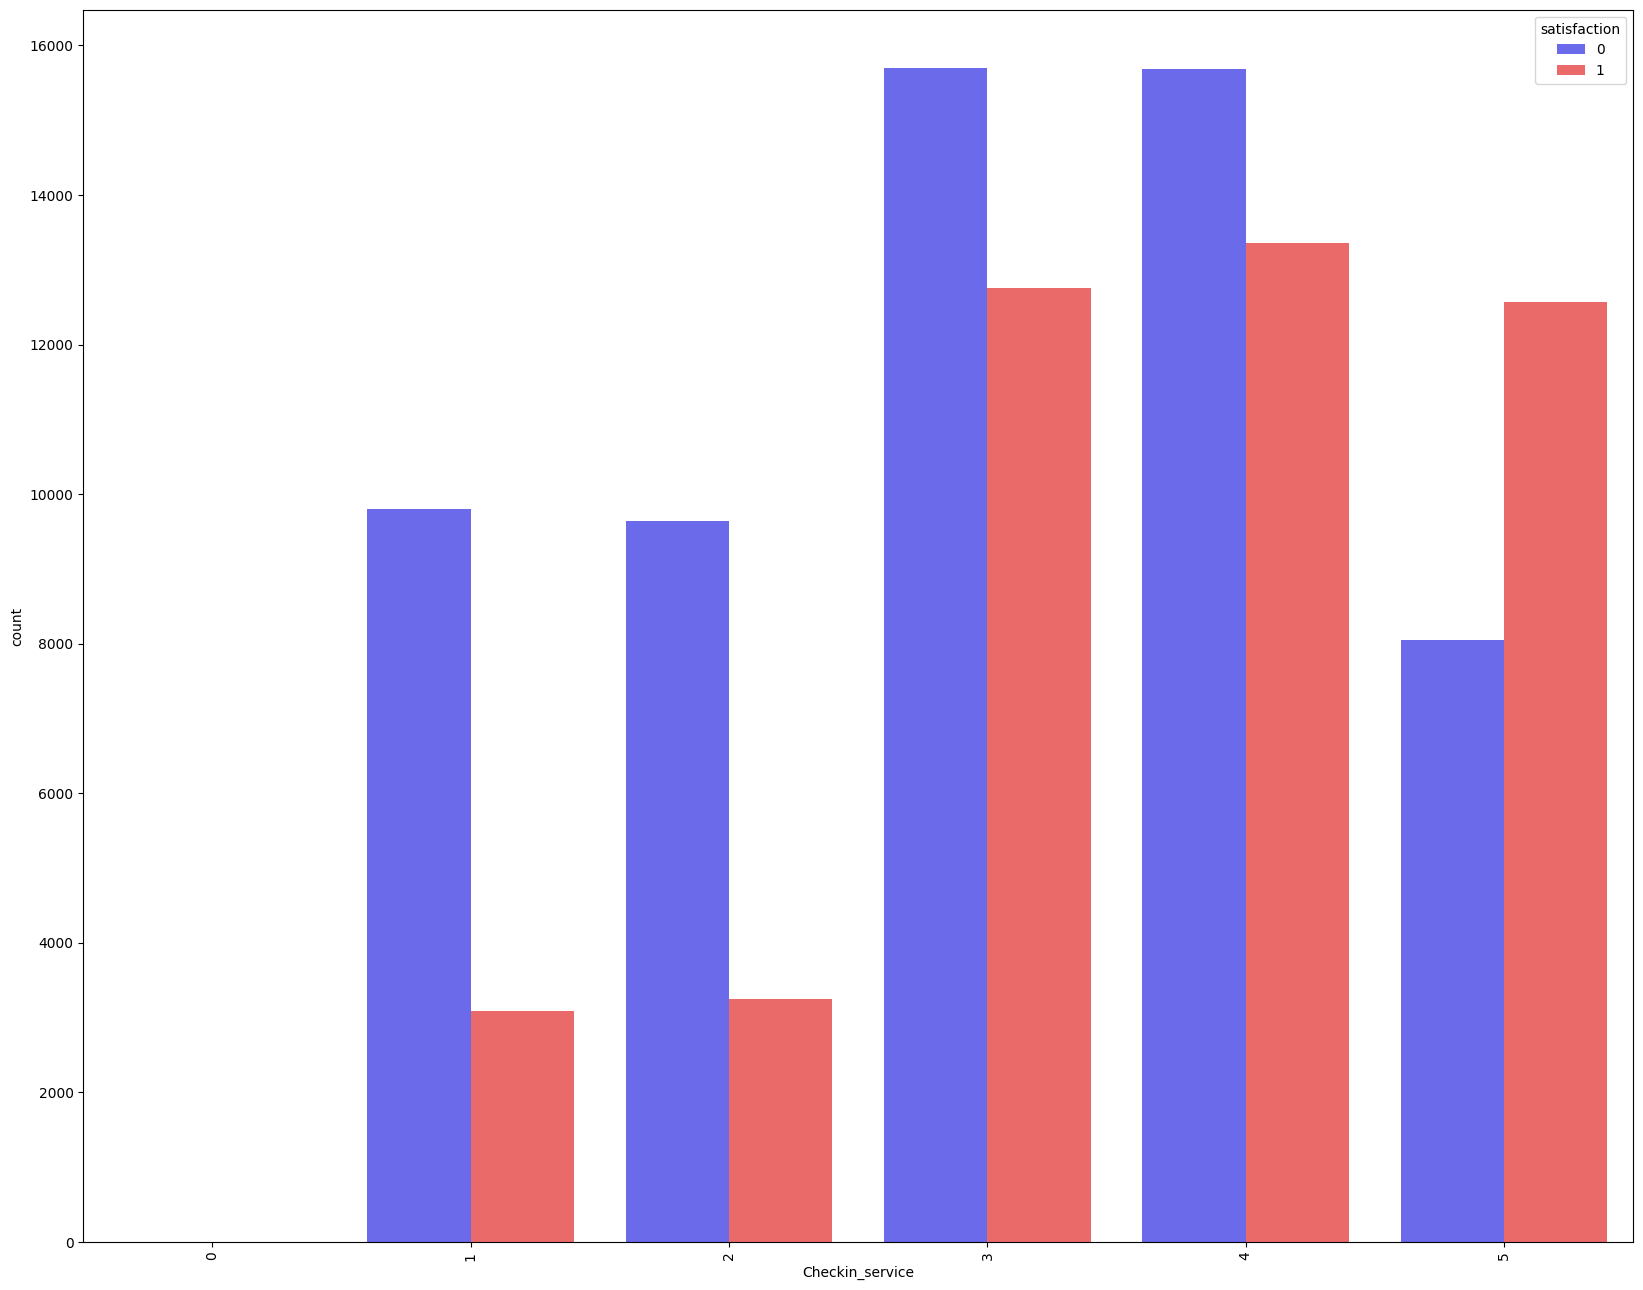

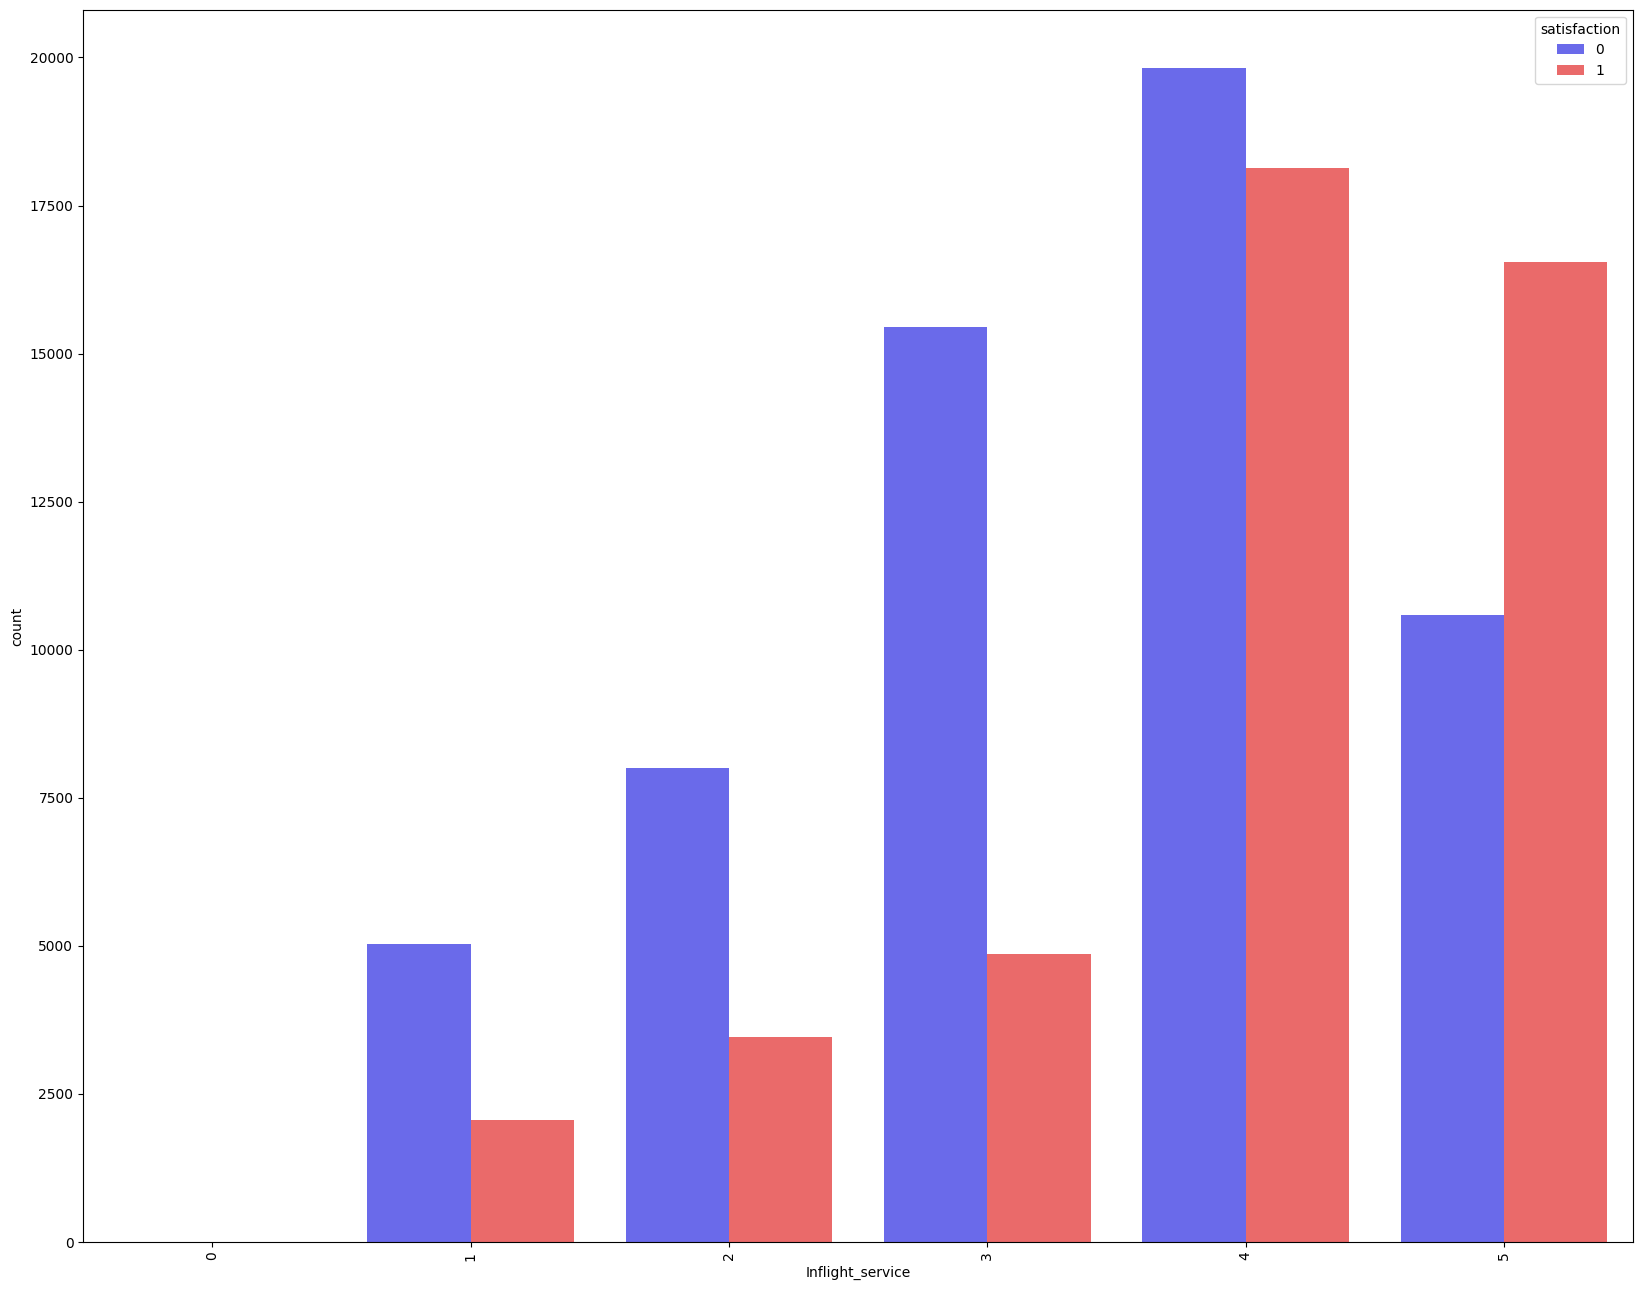

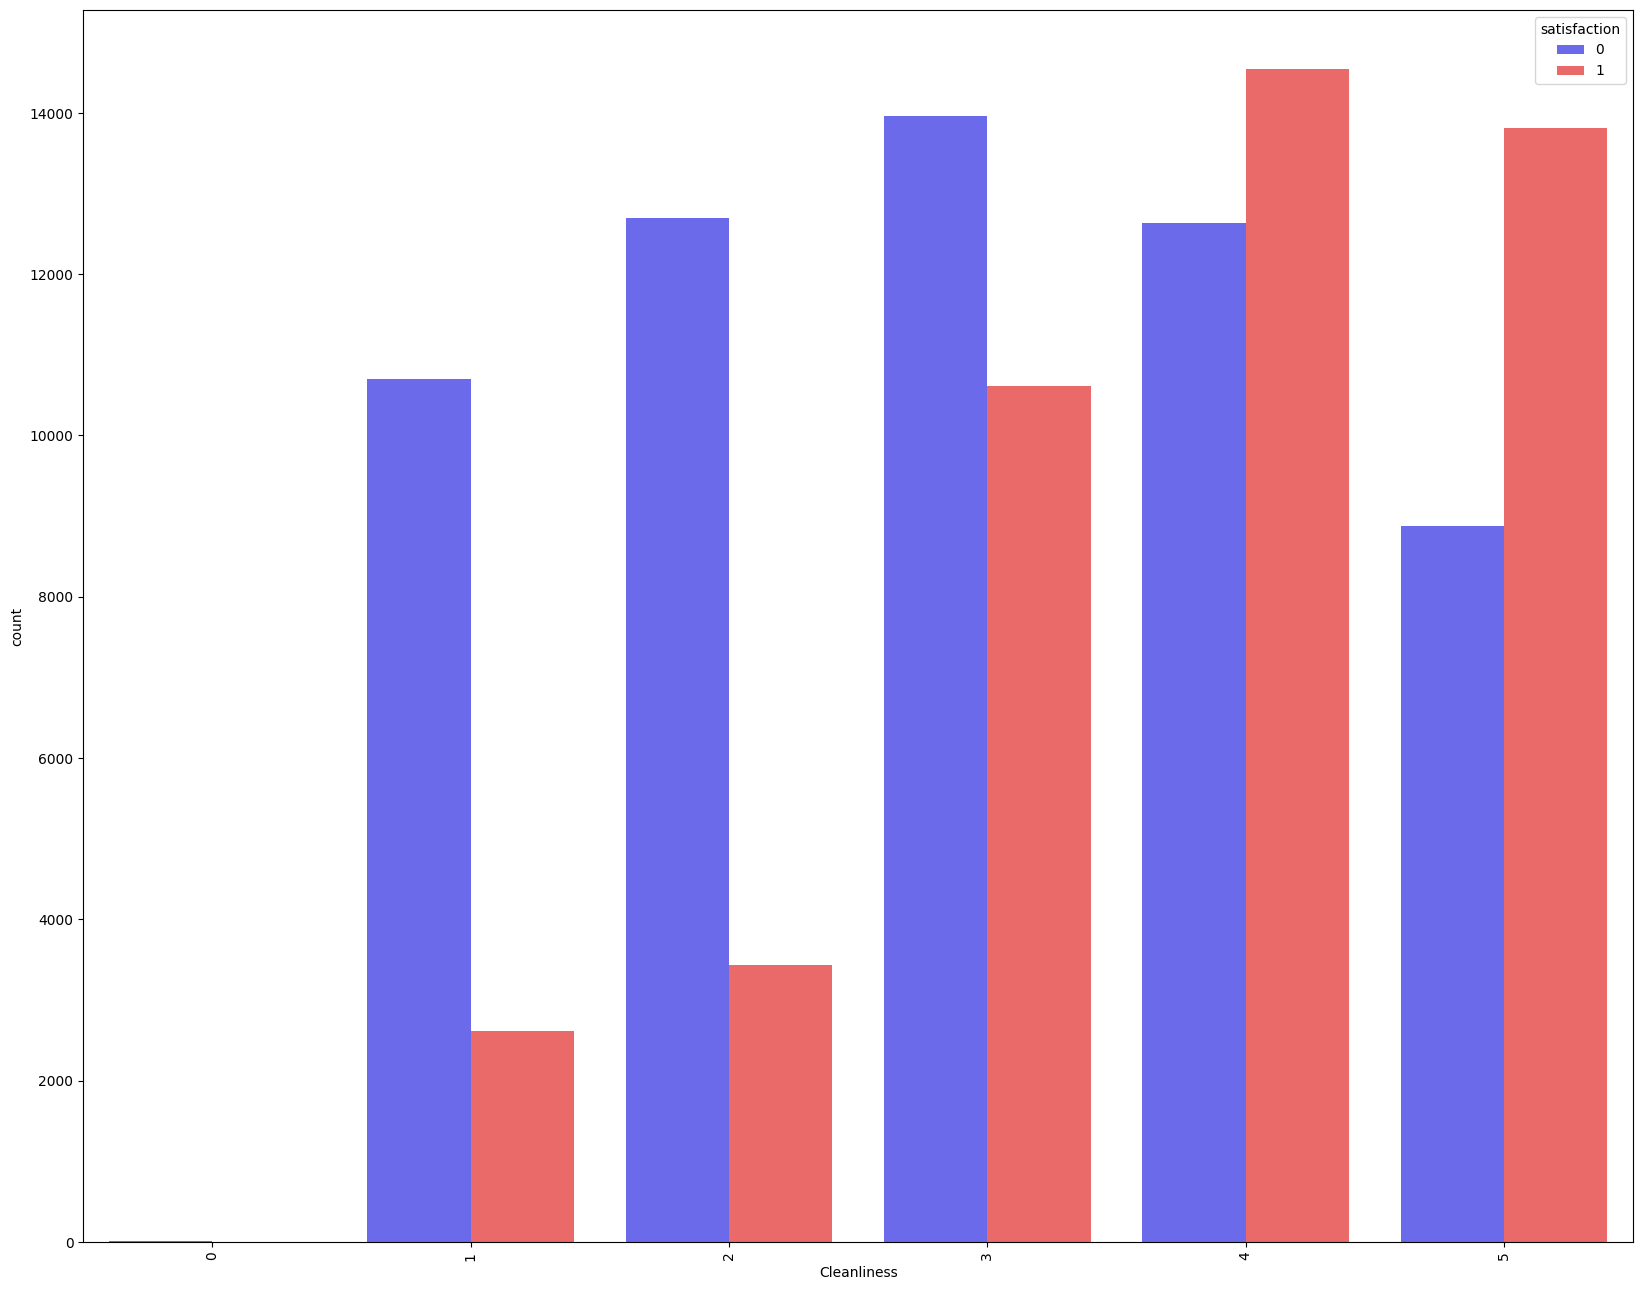

<Figure size 2000x1600 with 0 Axes>

<Figure size 2000x1600 with 0 Axes>

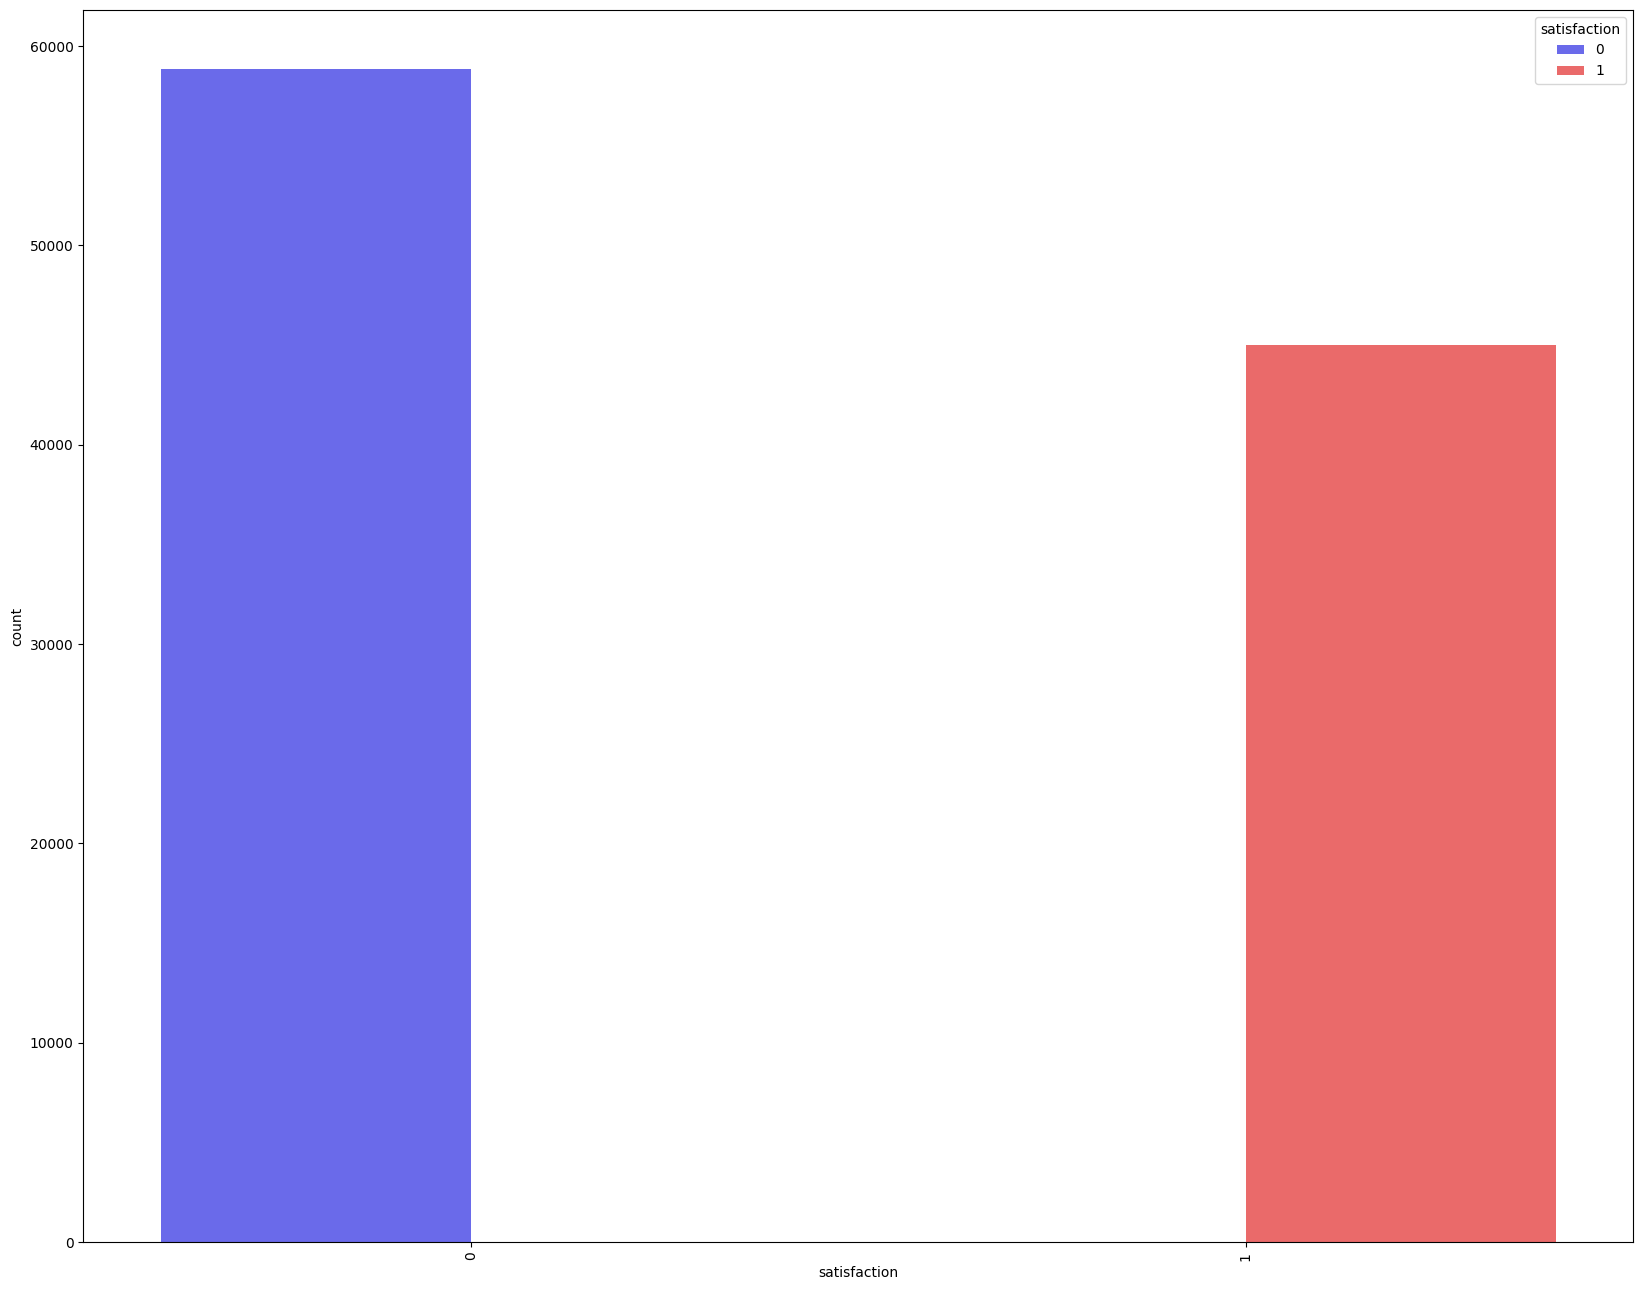

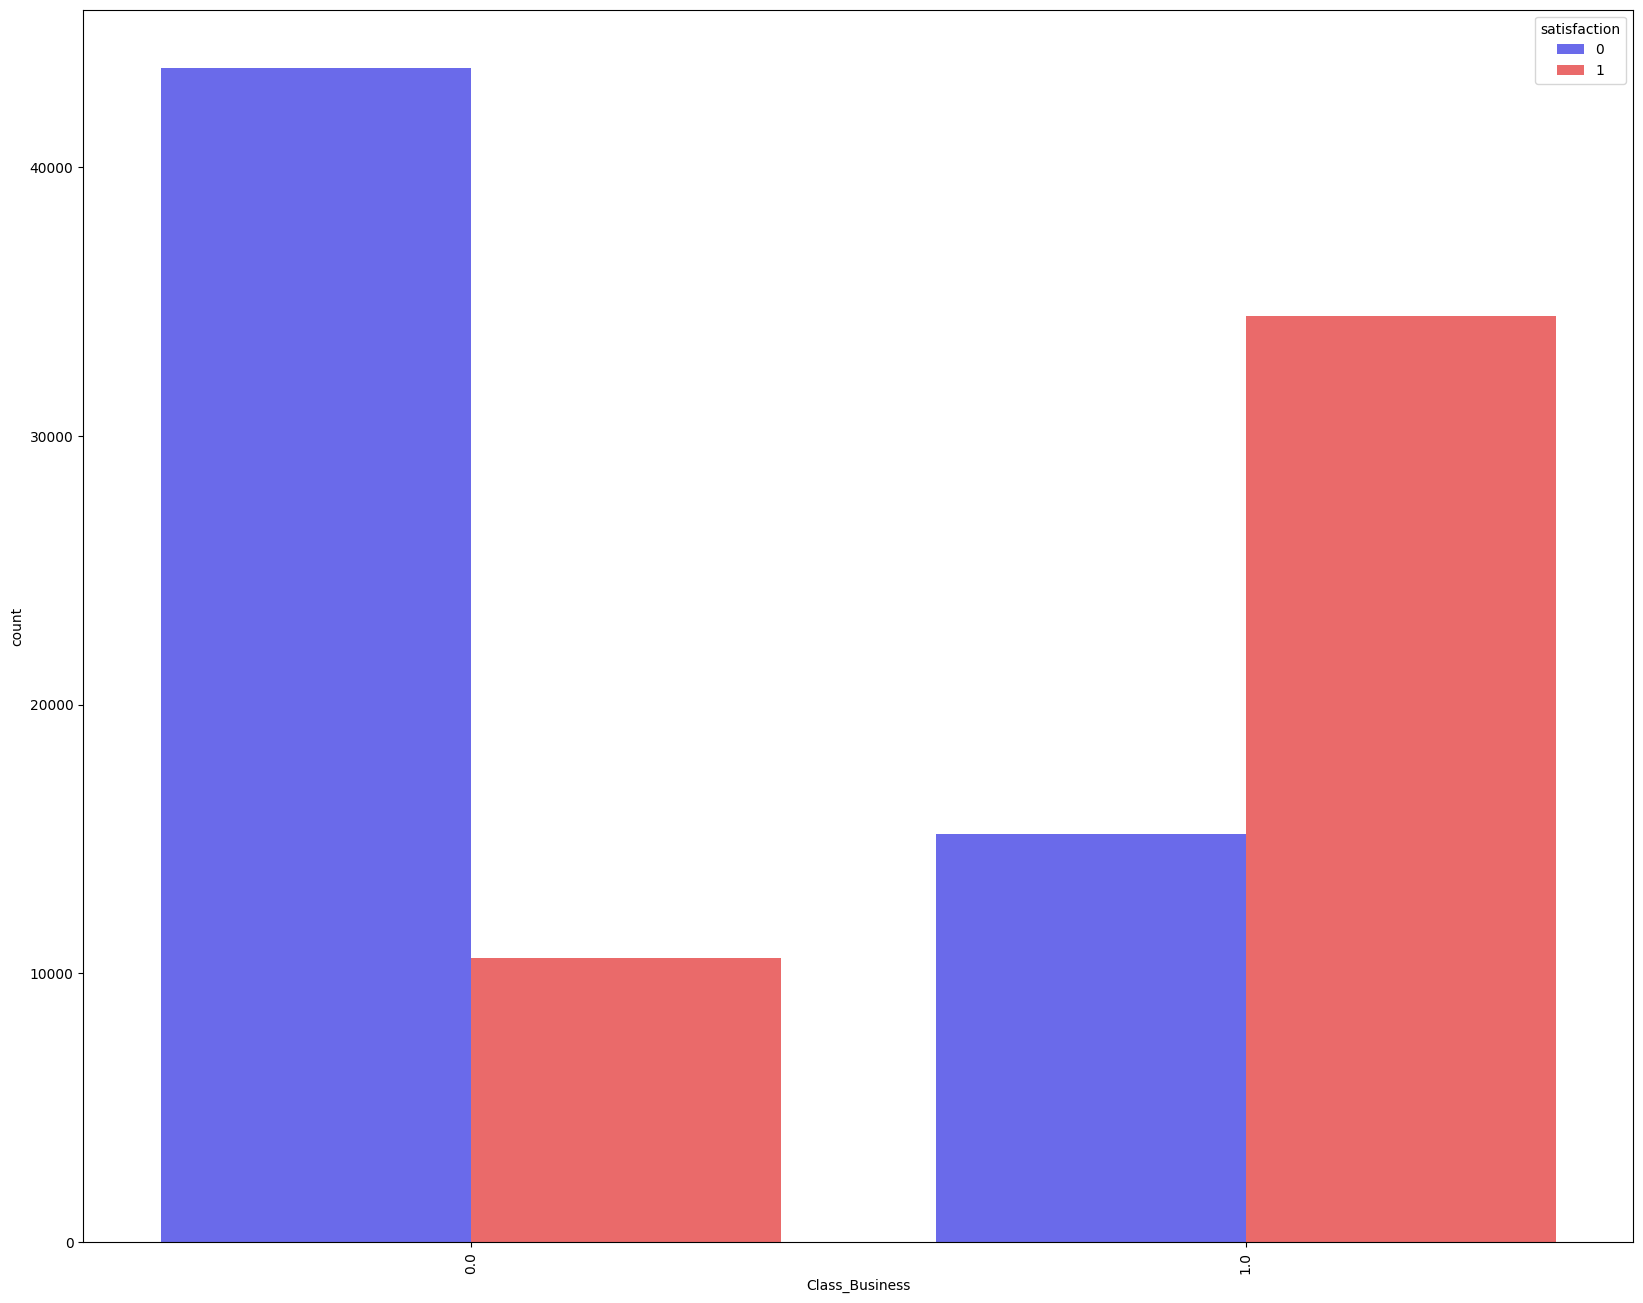

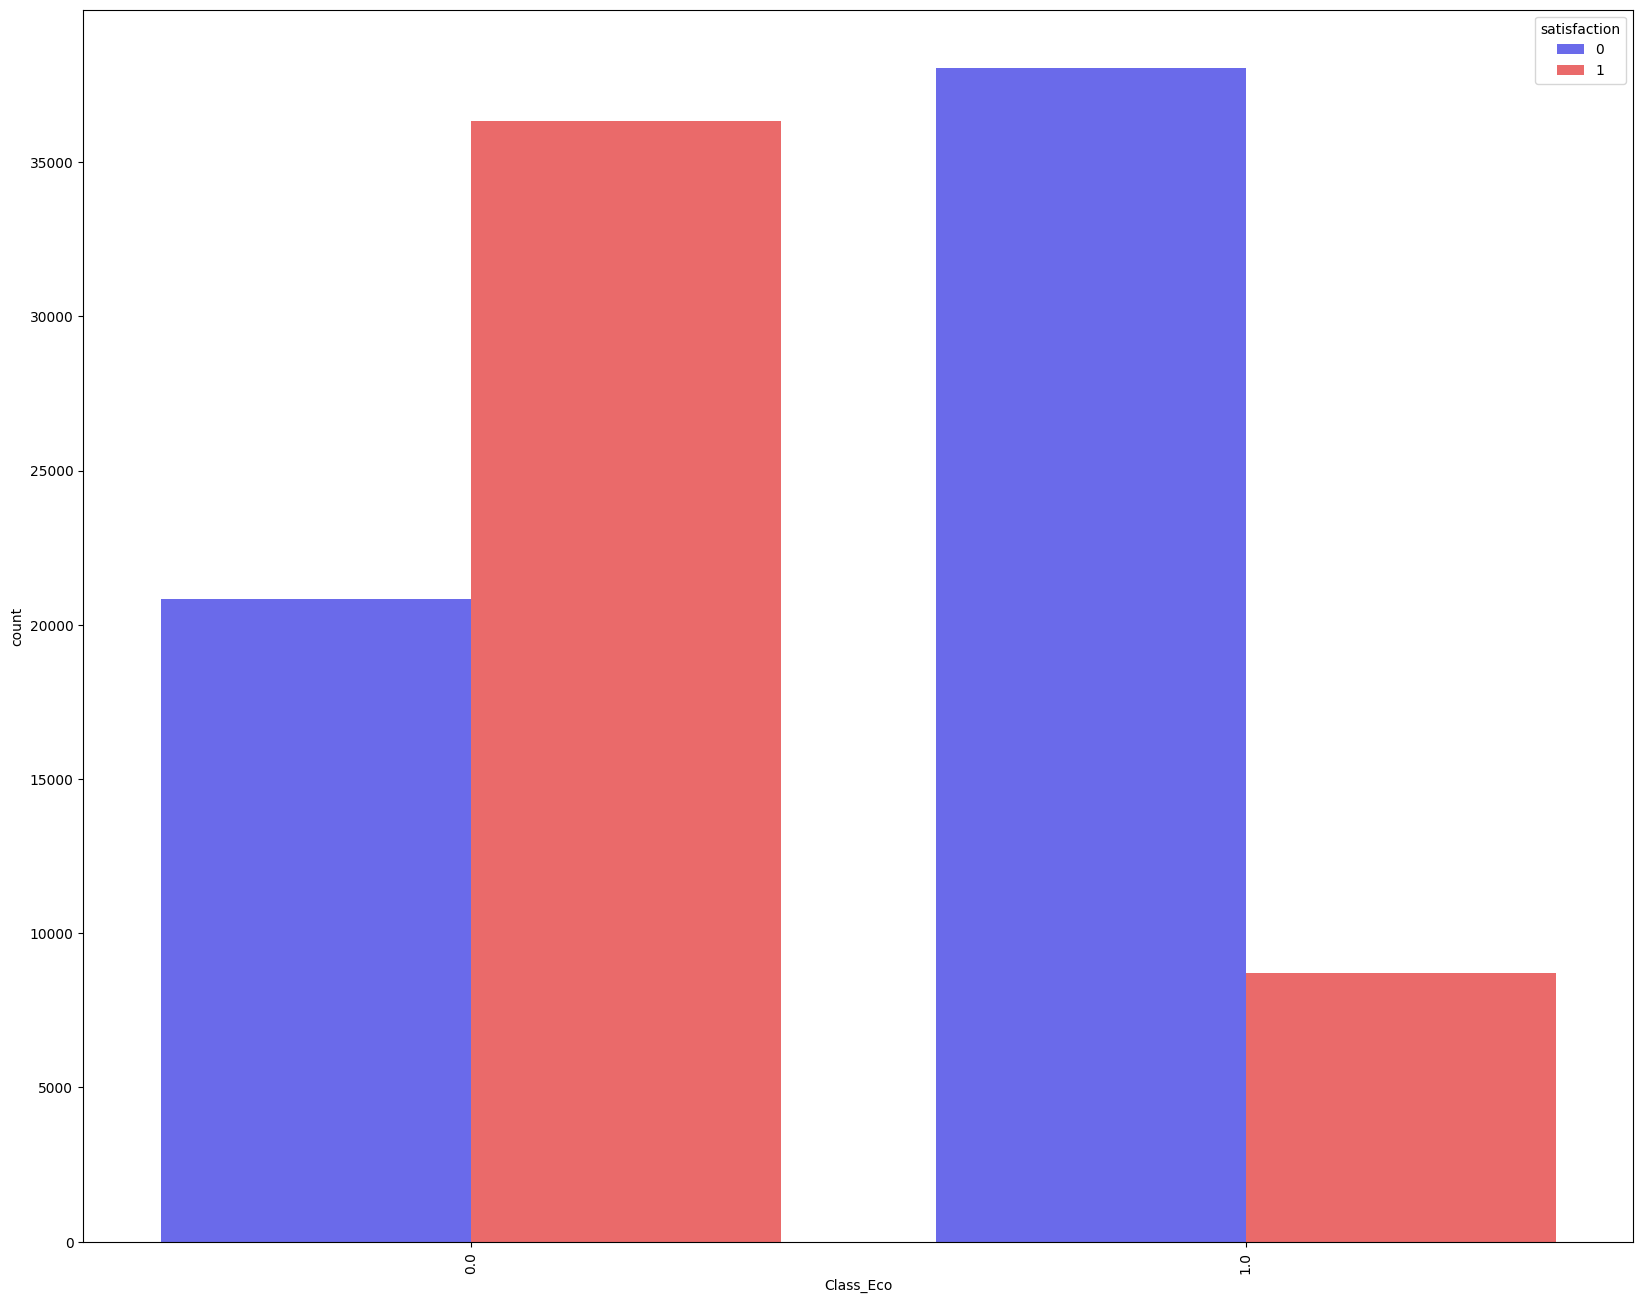

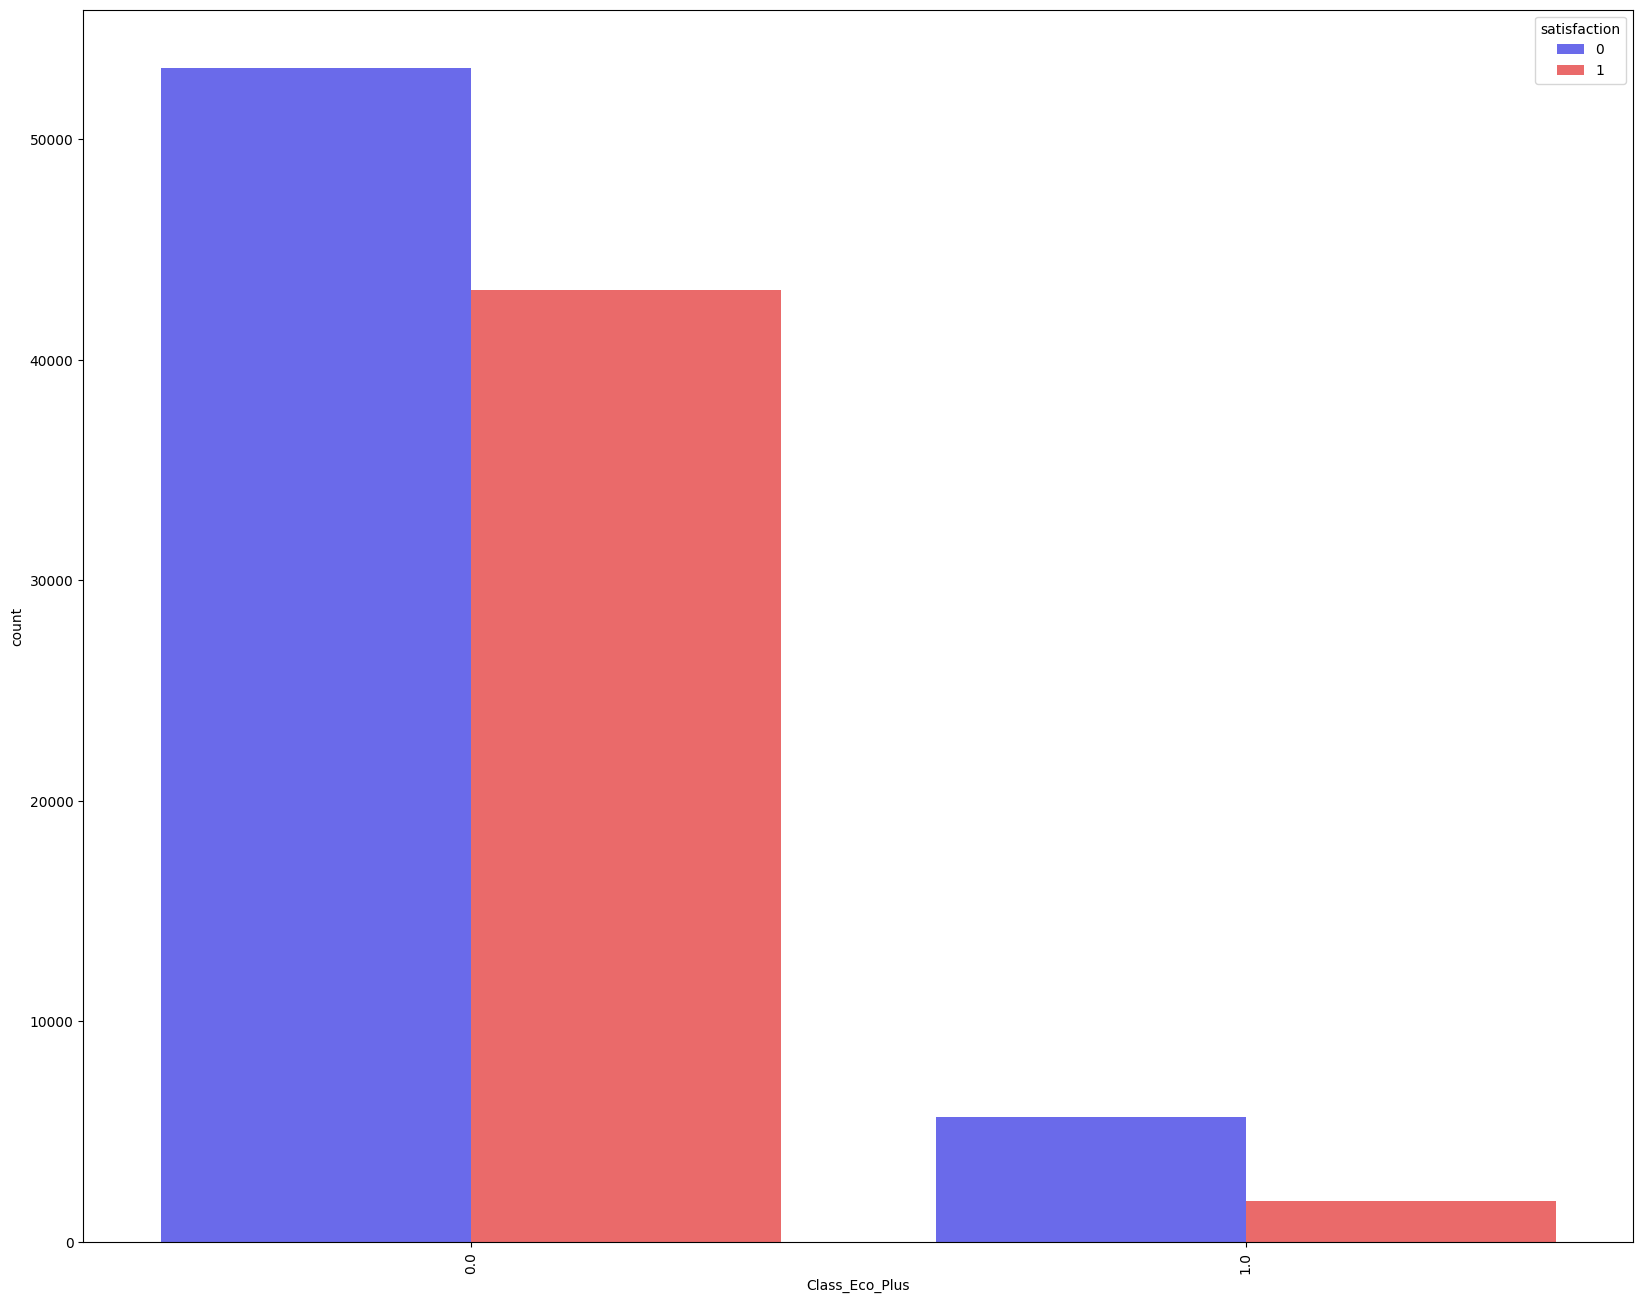

In [47]:
numerical_vars = training_data_encoded.columns
target_col = 'satisfaction'
plt.rcParams.update({'figure.max_open_warning': 0})
for i, name in enumerate(training_data_encoded[numerical_vars]):
    plt.figure(i, figsize=(20,16))
    graph_data = training_data_encoded.copy()
    unique_dataset = np.unique(training_data_encoded[name])
    num_rows = unique_dataset.shape
    if num_rows[0] < 80 :
        g=sns.countplot(x=name, data=graph_data, hue=target_col, palette='seismic')
        g.set_xticklabels(g.get_xticklabels(),rotation=90)

# Feature Extraction
**1. Feature selection by Correlation among attributes**

In [17]:
corr_matrix = training_data_encoded.corr()

corr_matrix.style.apply(lambda x: ["background: red" if v > 0.5  and v != 1.0000 else "" for v in x], axis = 1)

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco_Plus
Gender,1.000000,-0.031732,0.008928,0.006909,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000395,0.012211,0.010634,-0.005295,-0.010351
Customer_Type,-0.031732,1.000000,-0.281674,-0.308333,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004741,-0.187638,-0.085601,0.118694,-0.062967
Age,0.008928,-0.281674,1.000000,-0.048524,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012127,0.137167,0.138939,-0.132551,-0.013376
Type_of_Travel,0.006909,-0.308333,-0.048524,1.000000,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,-0.224803,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005674,-0.449000,-0.552125,0.500938,0.102775
Flight_Distance,0.005828,-0.225200,0.099461,-0.267344,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002423,0.298780,0.466896,-0.404493,-0.123674
Inflight_wifi_service,0.008974,-0.007543,0.017859,-0.105085,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019067,0.284245,0.032885,-0.037197,0.008034
Departure/Arrival_time_convenient,0.009142,-0.206869,0.038125,0.259763,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000863,-0.051601,-0.096870,0.082321,0.028740
Ease_of_Online_booking,0.006951,-0.019509,0.024842,-0.133511,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007972,0.171705,0.107436,-0.098039,-0.018914
Gate_location,0.000333,0.006078,-0.001330,-0.030700,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005136,0.000682,0.004526,-0.003488,-0.002031
Food_and_drink,0.005772,-0.059454,0.023000,-0.063439,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032472,0.209936,0.087114,-0.078801,-0.016671


In [18]:
corr_matrix['satisfaction'].sort_values(ascending=False).head(10)

satisfaction              1.000000
Class_Business            0.503848
Online_boarding           0.503557
Inflight_entertainment    0.398059
Seat_comfort              0.349459
On-board_service          0.322383
Leg_room_service          0.313131
Cleanliness               0.305198
Flight_Distance           0.298780
Inflight_wifi_service     0.284245
Name: satisfaction, dtype: float64

**2. Feature extraction by Chi-square test**

Chi-square Test: Chi-square test is a technique to determine the relationship between the categorical variables. The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.
https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/

In [19]:
r_scaler = MinMaxScaler()
r_scaler.fit(training_data_encoded)
modified_data = pd.DataFrame(r_scaler.transform(training_data_encoded), columns=training_data_encoded.columns)
modified_data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco_Plus
0,1.0,0.0,0.076923,1.0,0.086632,0.6,0.8,0.6,0.2,1.0,...,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0,0.0,0.0,1.0
1,1.0,1.0,0.230769,0.0,0.041195,0.6,0.4,0.6,0.6,0.2,...,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0,1.0,0.0,0.0
2,0.0,0.0,0.243590,0.0,0.224354,0.4,0.4,0.4,0.4,1.0,...,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0,1.0,0.0,0.0
3,0.0,0.0,0.230769,0.0,0.107229,0.4,1.0,1.0,1.0,0.4,...,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0,1.0,0.0,0.0
4,1.0,0.0,0.692308,0.0,0.036955,0.6,0.6,0.6,0.6,0.8,...,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0,1.0,0.0,0.0


In [20]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer_Type', 'Type_of_Travel', 'Flight_Distance',
       'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'Class_Business', 'Class_Eco',
       'Class_Eco_Plus'],
      dtype='object')


**3. Feature Selection by Embedded Methods**

In [21]:
X = training_data_encoded.drop('satisfaction', axis=1)
y = training_data_encoded['satisfaction']

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y).feature_importances_)


['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Inflight_entertainment', 'Class_Business', 'Class_Eco']
[0.0050073  0.03434909 0.03340454 0.08200957 0.03486368 0.13408204
 0.01627219 0.04060396 0.01571962 0.01257587 0.17083116 0.04100693
 0.0478615  0.0327843  0.04073041 0.02611357 0.02308399 0.02386949
 0.0240159  0.01137788 0.01291011 0.08528853 0.04839832 0.00284006]


Using these three feature selection techiniques these are the final features we will be focussing on

**Really Important Features**: Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

**Important Features**: Class_Business, Class_Eco, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

# Building Models

**1. Normalize the data and separate out Dependent and non-dependent variable **

In [22]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']
# Split into dependent and non-dependent variable
X_train = training_data_encoded[features]
y_train = training_data_encoded[target].to_numpy()
X_test = testing_data_encoded[features]
y_test = testing_data_encoded[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**2. Define function to run various models and plot predicted output**

In [23]:
def run_model(model, X_train, y_train, X_test, y_test):
    t0=time.time()
    
    # Train model
    model.fit(X_train,y_train.ravel())
    
    #Predict Result
    y_pred = model.predict(X_test)
    
    #calculate Accuracy, ROC_AUC, Time consumed 
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    # plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink,)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize = 'all')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    # plot_roc_curve(model, X_test, y_test)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    display.plot()
    plt.show()

    
    return model, accuracy, roc_auc, time_taken

### Model 1 - Logistic Regression

Accuracy = 0.8534801355097013
ROC Area under Curve = 0.8493479130390728
Time taken = 1.3062732219696045
              precision    recall  f1-score   support

           0    0.85950   0.88321   0.87119     14573
           1    0.84529   0.81549   0.83012     11403

    accuracy                        0.85348     25976
   macro avg    0.85239   0.84935   0.85066     25976
weighted avg    0.85326   0.85348   0.85316     25976



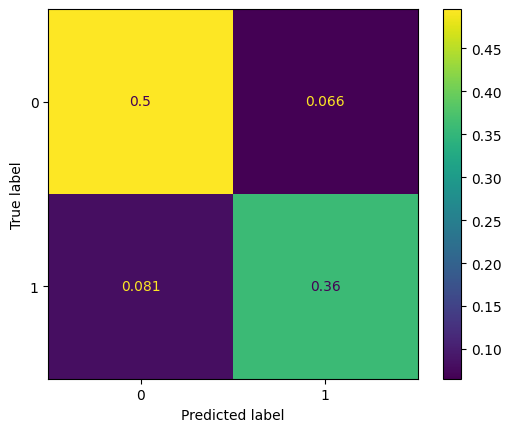

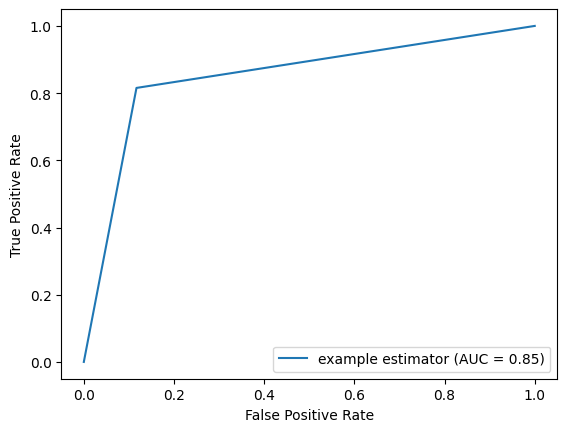

In [24]:
params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

### Model 2 - Naive Bayes Classifier

Accuracy = 0.8488604866030182
ROC Area under Curve = 0.8451448672295293
Time taken = 0.058615922927856445
              precision    recall  f1-score   support

           0    0.85793   0.87559   0.86667     14573
           1    0.83671   0.81470   0.82556     11403

    accuracy                        0.84886     25976
   macro avg    0.84732   0.84514   0.84611     25976
weighted avg    0.84862   0.84886   0.84862     25976



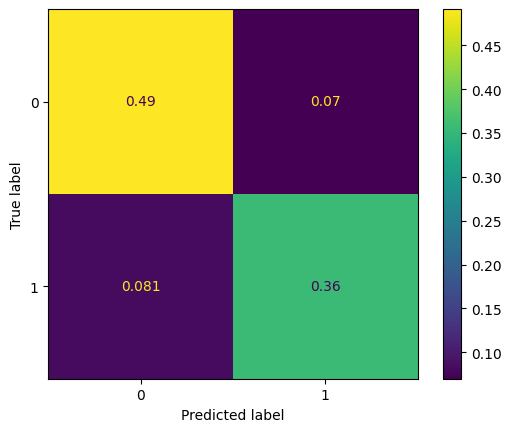

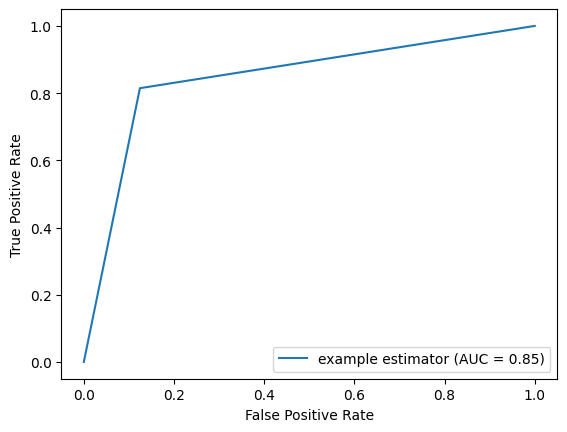

In [25]:
params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

### Model 3 - K-Nearest Neighbor Classifier

Accuracy = 0.926778564829073
ROC Area under Curve = 0.9204733569128027
Time taken = 11.401201963424683
              precision    recall  f1-score   support

           0    0.90449   0.97214   0.93709     14573
           1    0.96063   0.86881   0.91241     11403

    accuracy                        0.92678     25976
   macro avg    0.93256   0.92047   0.92475     25976
weighted avg    0.92913   0.92678   0.92626     25976



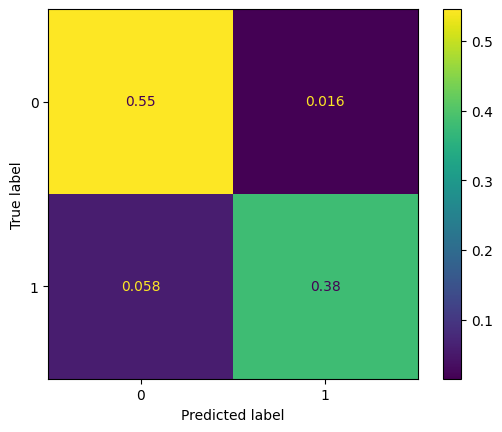

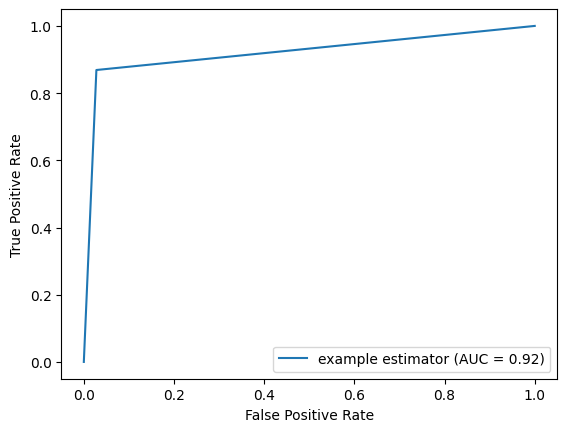

In [26]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

### Model 4 - Decision Tree Classifier

Accuracy = 0.9313597166615337
ROC Area under Curve = 0.9287816214815097
Time taken = 0.15469884872436523
              precision    recall  f1-score   support

           0    0.92931   0.94991   0.93950     14573
           1    0.93412   0.90766   0.92070     11403

    accuracy                        0.93136     25976
   macro avg    0.93171   0.92878   0.93010     25976
weighted avg    0.93142   0.93136   0.93124     25976



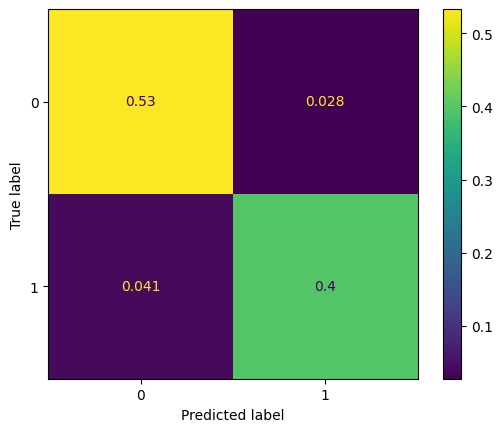

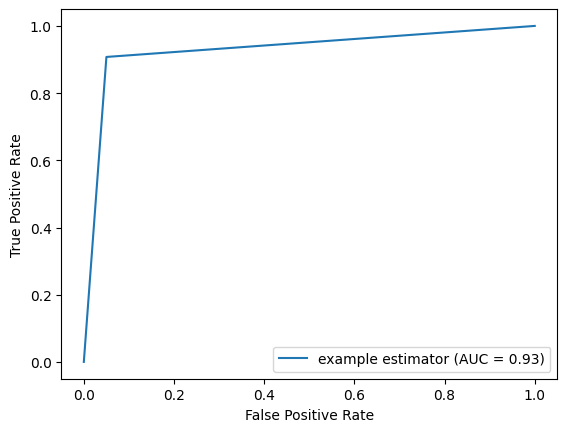

In [27]:
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

### Model 5 - Random Forest

Accuracy = 0.9517246689251617
ROC Area under Curve = 0.9491730748304151
Time taken = 14.644948244094849
              precision    recall  f1-score   support

           0    0.94530   0.97008   0.95753     14573
           1    0.96044   0.92826   0.94408     11403

    accuracy                        0.95172     25976
   macro avg    0.95287   0.94917   0.95080     25976
weighted avg    0.95195   0.95172   0.95163     25976



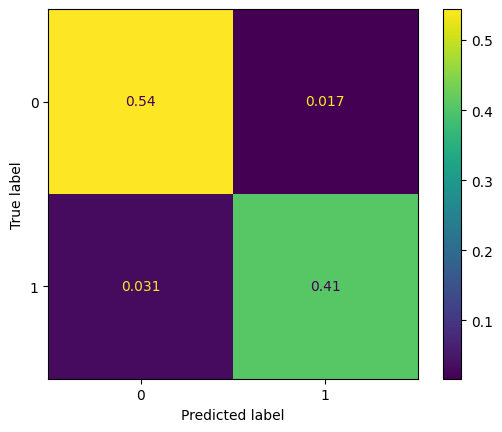

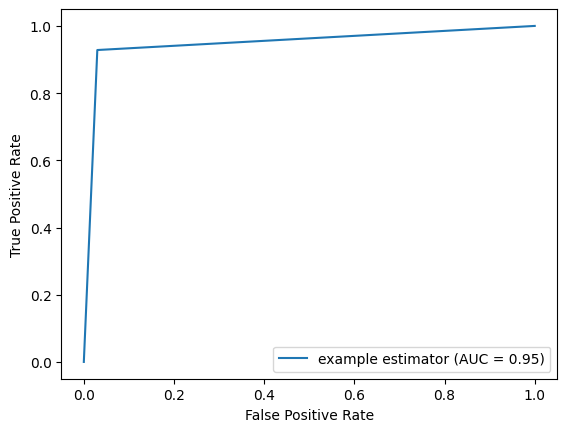

In [28]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

### Model 6 - Extreme Gradient Boosting

Accuracy = 0.7888435478903604
ROC Area under Curve = 0.7604755385766815
Time taken = 7.171400547027588
              precision    recall  f1-score   support

           0    0.72889   0.99293   0.84067     14573
           1    0.98318   0.52802   0.68705     11403

    accuracy                        0.78884     25976
   macro avg    0.85604   0.76048   0.76386     25976
weighted avg    0.84052   0.78884   0.77323     25976



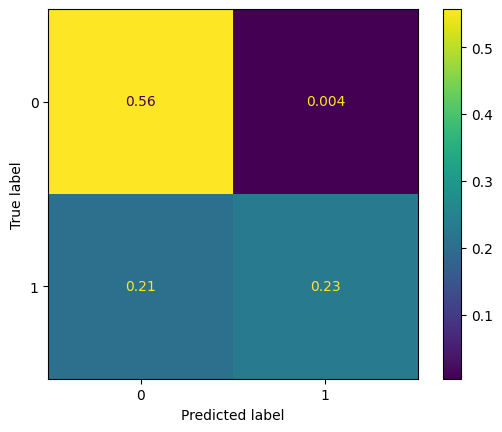

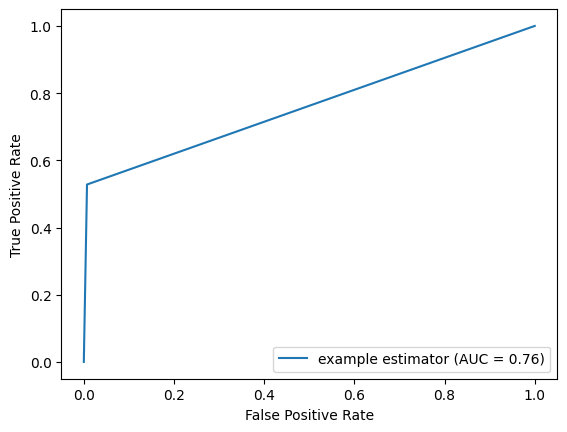

In [29]:
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

### Model 7 - Adaptive Gradient Boosting

Accuracy = 0.9138050508161379
ROC Area under Curve = 0.9114766231562108
Time taken = 48.99068570137024
              precision    recall  f1-score   support

           0    0.91703   0.93056   0.92374     14573
           1    0.90955   0.89240   0.90089     11403

    accuracy                        0.91381     25976
   macro avg    0.91329   0.91148   0.91232     25976
weighted avg    0.91374   0.91381   0.91371     25976



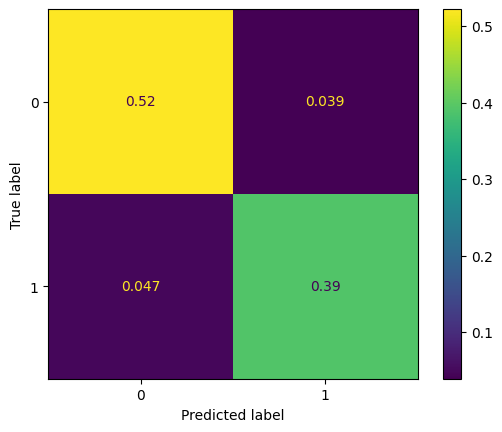

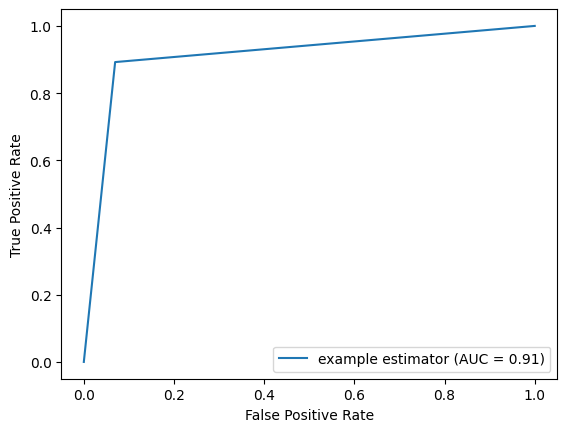

In [30]:
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = AdaBoostClassifier(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

# Model Comparison
We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

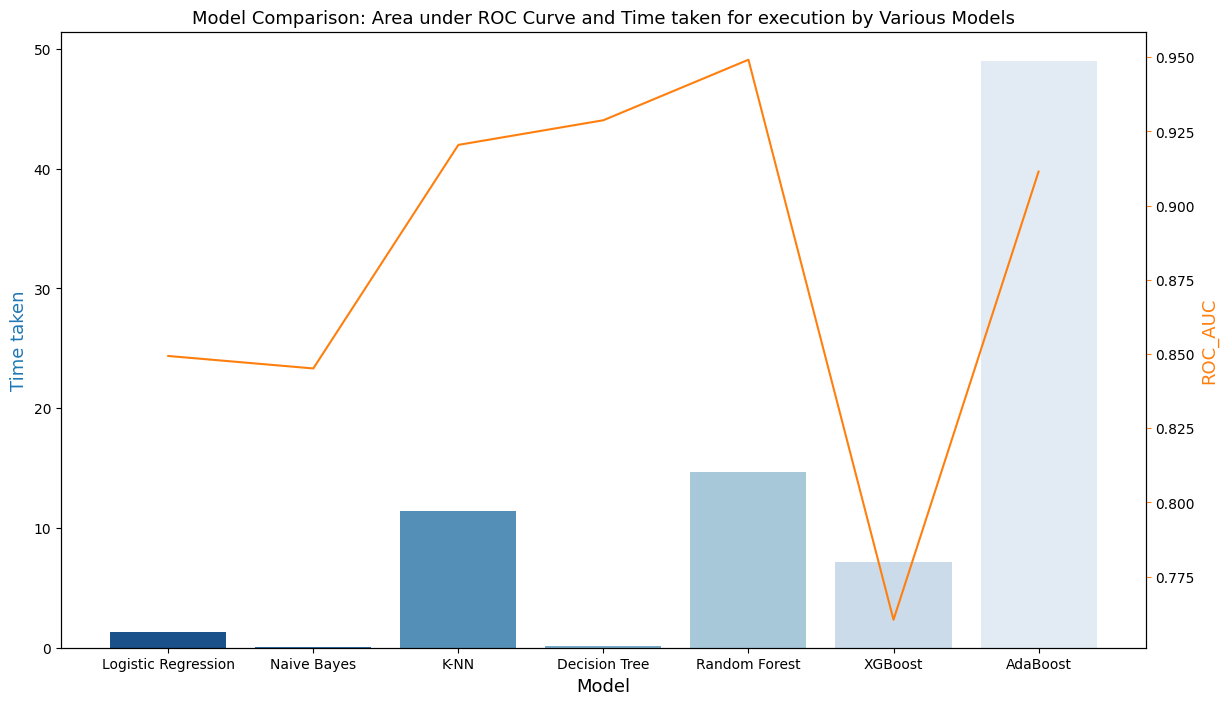

In [31]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


We observe, Random Forest and AdaBoost have performed equally well on producing high ROC_AUC score (90%). But Random Forest has taken lesser amount of time compared to time taken by AdaBoost. So, we will stick to Random Forest as the best model.